<a href="https://colab.research.google.com/github/siu1997/MSc-Part-1-Sem-1/blob/main/Practical11/Practical11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import statistics
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
Inferential Statistics

Inferential statistics allows you to make predictions (“inferences”) from that data. With inferential statistics, you take data from samples and make generalizations about a population.

1.Calculating Expected Parameters (Mean and Standard Deviation)

2.Estimating population parameters

1.Mean & Standard Deviation



In [ ]:
Q1.The mean and standard deviation of the tax value of all vehicles registered in a certain state are μ=$13,525 & σ=$4,180. Suppose random samples of size 100 are drawn from the population of vehicles. What are the mean μX−−and standard deviation σX−− of the sample mean X−−?

In [ ]:
µx=µ=13525
n=100
σ=4180

#Formula --- σx=σ/√n
n=math.sqrt(n)
σx= σ/n
print("Mean is:" +str(µ))
print("Standard Deviation is:" +str(σx))

Mean is:13525
Standard Deviation is:418.0


In [ ]:
Q2.Random samples of size 225 are drawn from a population with mean 100 and standard deviation 20. Find the mean and standard deviation of the sample mean.



In [ ]:
n=225
µx=µ=100
σ=20

#Formula --- σx=σ/√n
n=math.sqrt(n)
σx=σ/n
print("Mean is:" +str(µ))
print("Standard Deviation is:" +str(σx))

Mean is:100
Standard Deviation is:1.3333333333333333


In [ ]:
2.Estimating population parameters

Point Estimates, Sampling Distribution and Confidence Interval.

Problem Statement: Point Estimate

Q1.For a company of 9000 employees, find the average length of breaks taken by employees in a single day using sample mean point estimate.

Get the data distribution using a poisson random variable and find the point estimate sample mean for a longer break taken by 3000 employees. Get the data distribution using a poisson random variable and find the point estimate sample mean for a shorter break taken by 6000 employees. Combine the entire population of 9000 employees with longer breaks and shorter breaks and find the population mean estimate, that is the average break time taken by the company employees. Simulate the result for a random sample of size 100 and find the difference in sample mean and population mean.

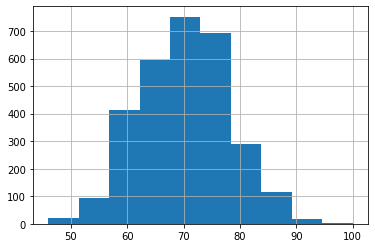

In [ ]:
###POINT ESTIMATES
np.random.seed(1234)
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
pd.Series(long_breaks).hist()

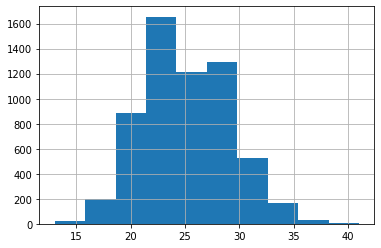

In [ ]:
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
# represents 6000 people who take about a 15 minute break
pd.Series(short_breaks).hist()

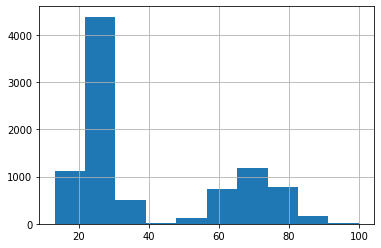

In [ ]:
breaks = np.concatenate((long_breaks, short_breaks))
# put the two arrays together to get our "population" of 9000 people
pd.Series(breaks).hist()

In [ ]:
breaks.mean()
sample_breaks = np.random.choice(a = breaks, size=100)
sample_breaks
# taking a sample of 100 employees
breaks.mean() - sample_breaks.mean()
# difference between means is 4.09 minutes, not bad!

0.6994444444444454

In [ ]:
Problem Statement: Sampling Distribution

Q1.For a company of 9000 employees, find the average length of breaks taken by employees in a single day using sample mean point estimate.

Visualize the data of both loger breaks and shorter breaks that are calculated in the previous example into a single plot, explain the plot and check for the type of distribution. If the data distribution is not in normal form, get it into normal form using the more number of samples, say 500. Plot the average break time (Sample mean) taken by company employees with the help of histogram for these 500 samples. Calculate the difference of sample mean of sample with size 100 and sample with size 500 and state the conclusion.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ff059bb90>]],
      dtype=object)

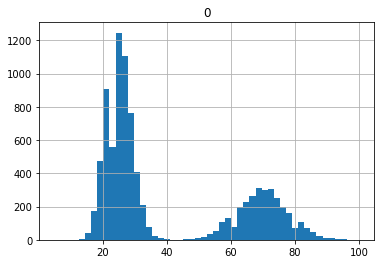

In [ ]:
##SAMPLING DISTRIBUTION
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


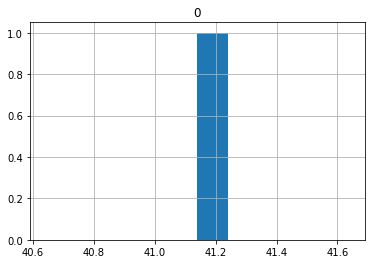

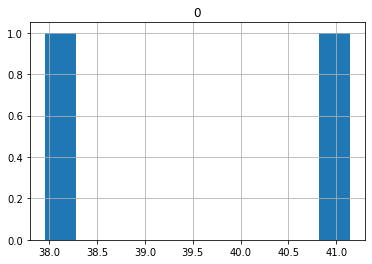

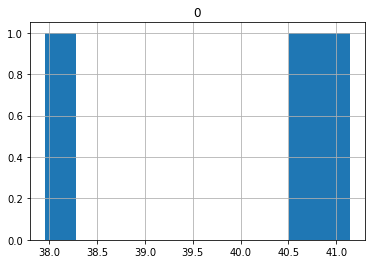

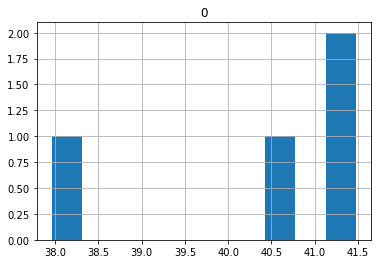

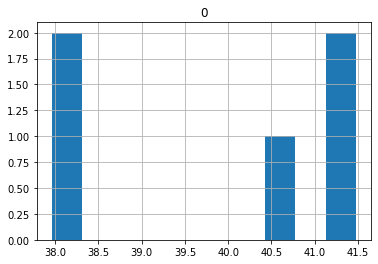

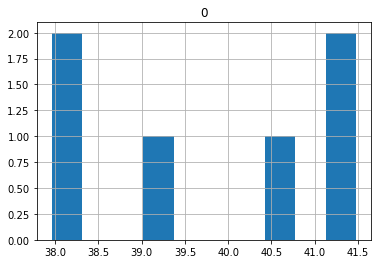

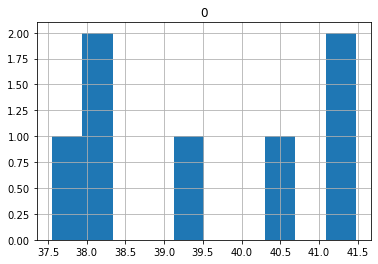

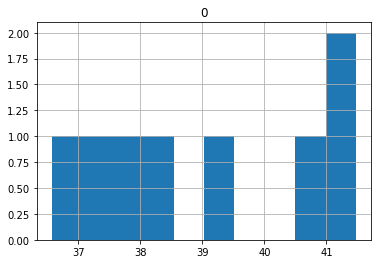

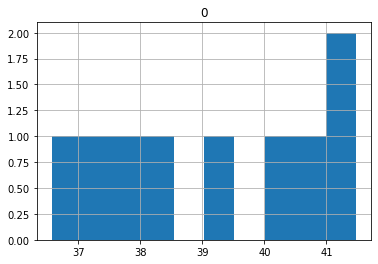

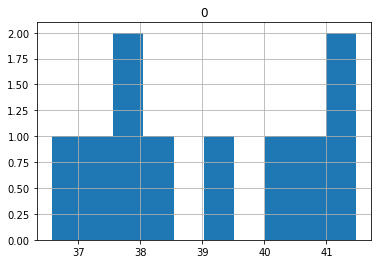

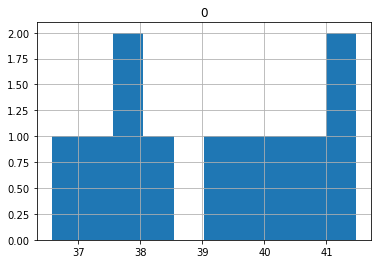

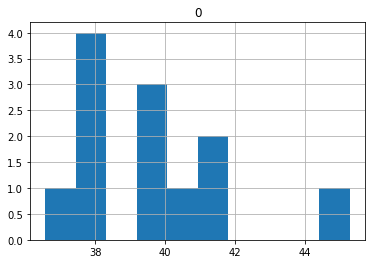

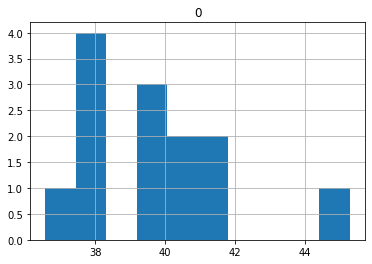

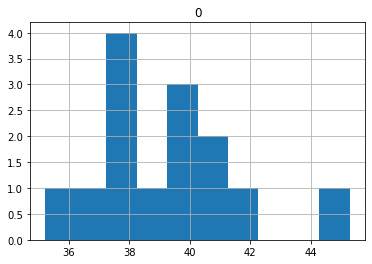

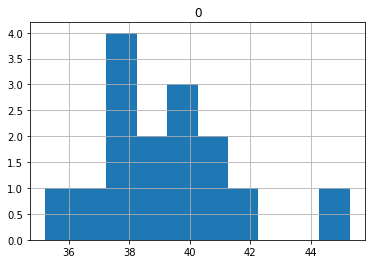

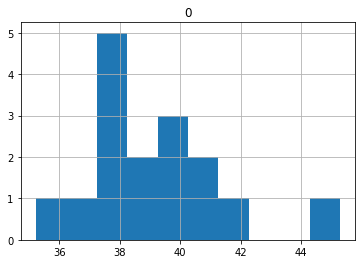

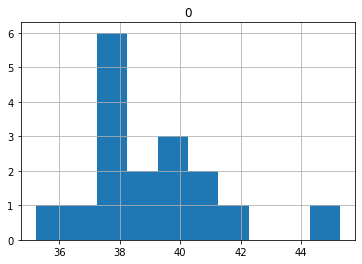

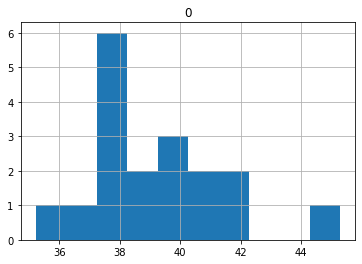

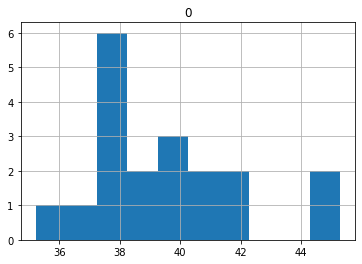

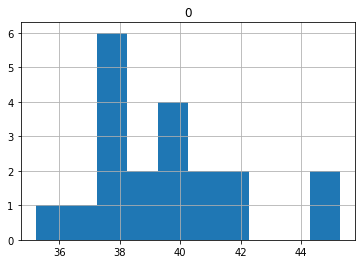

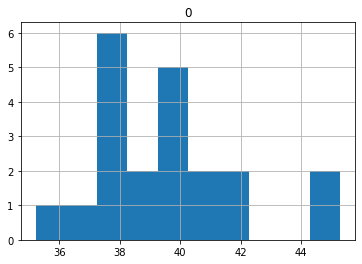

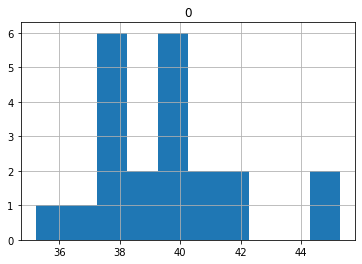

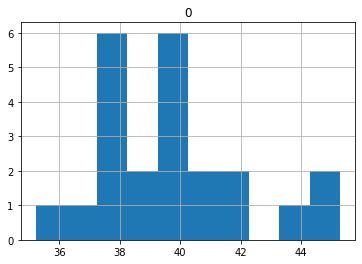

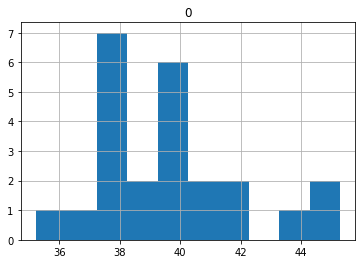

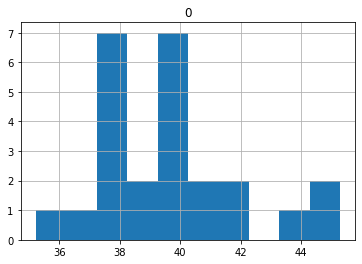

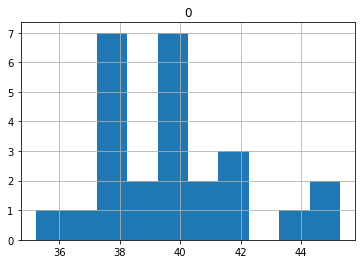

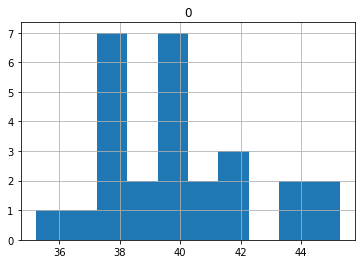

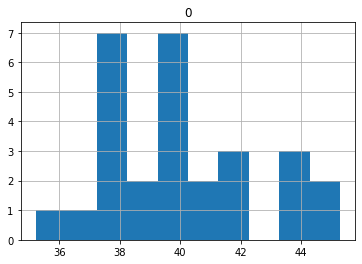

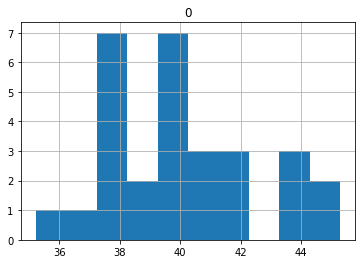

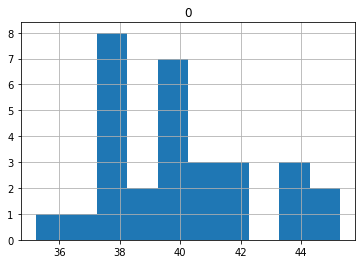

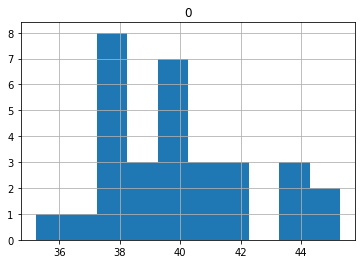

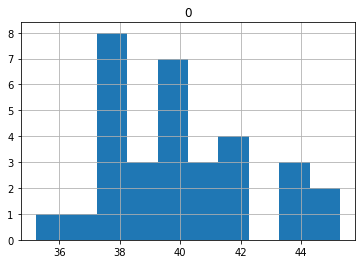

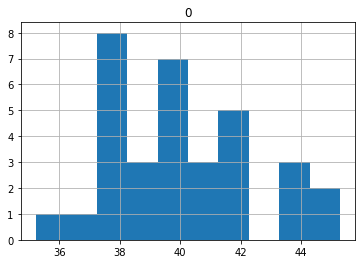

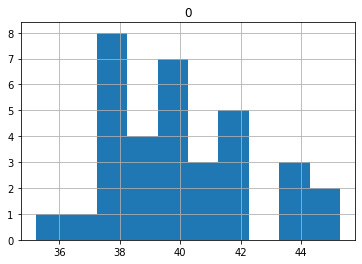

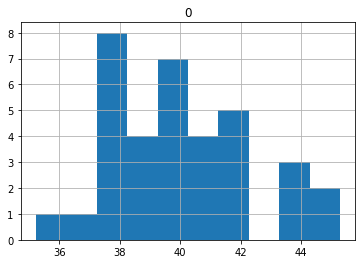

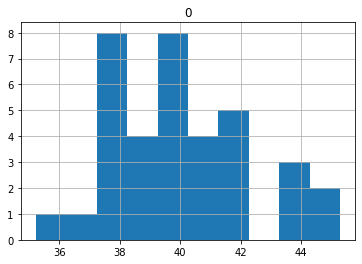

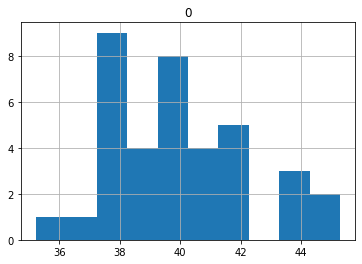

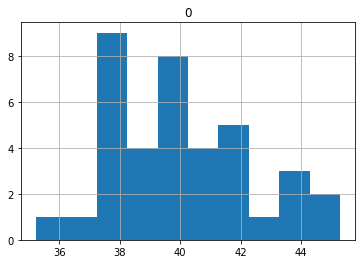

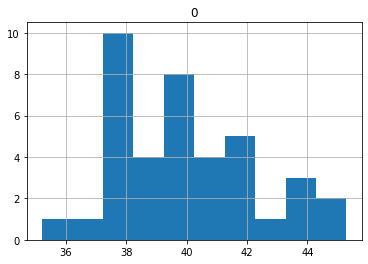

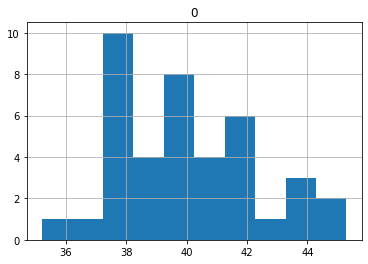

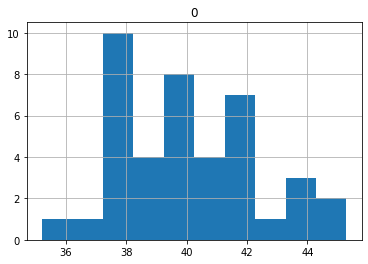

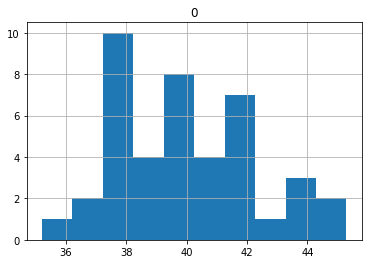

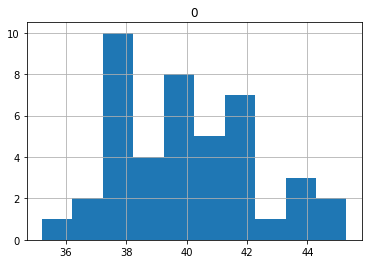

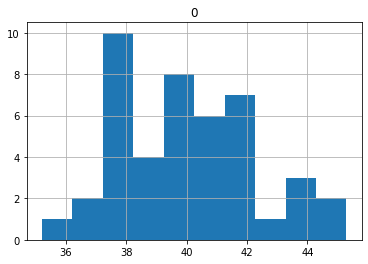

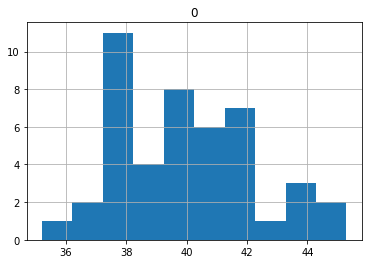

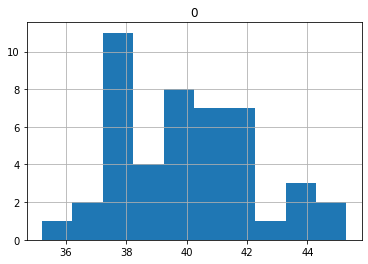

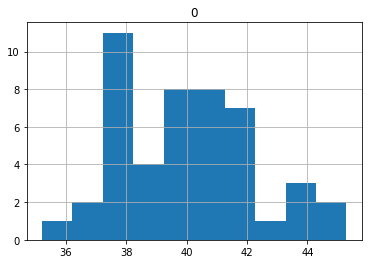

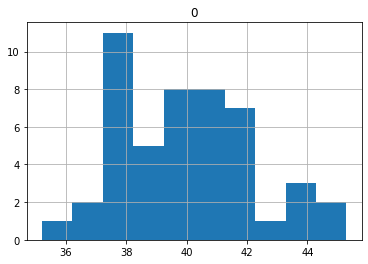

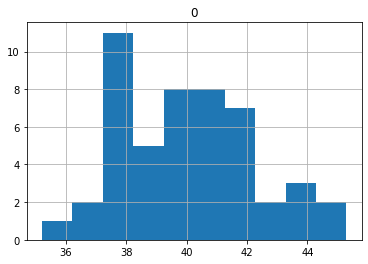

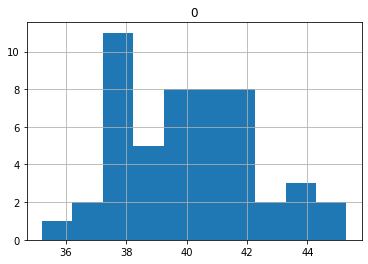

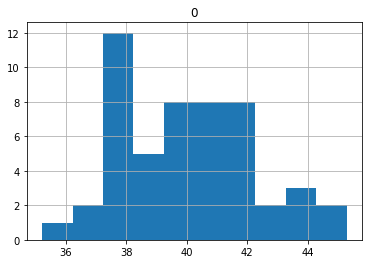

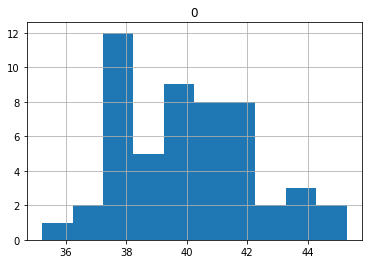

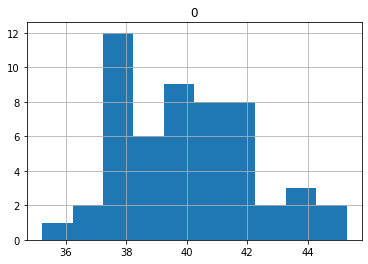

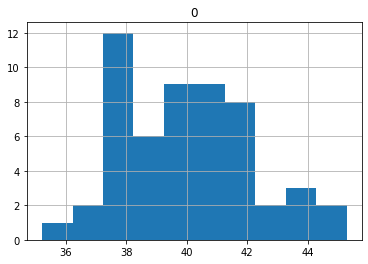

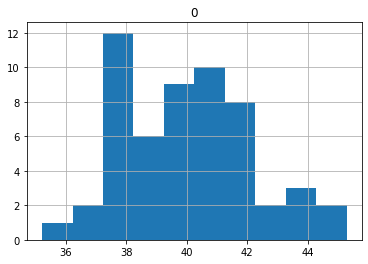

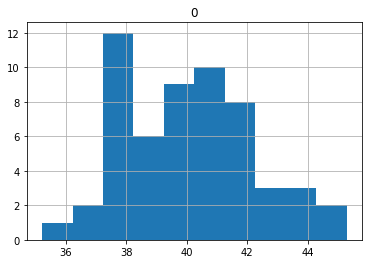

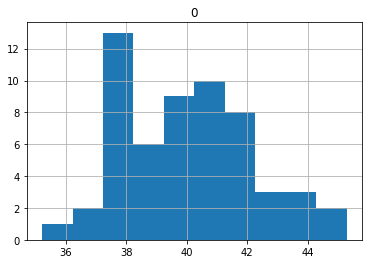

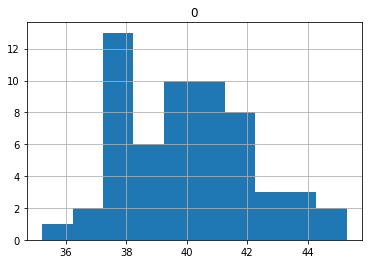

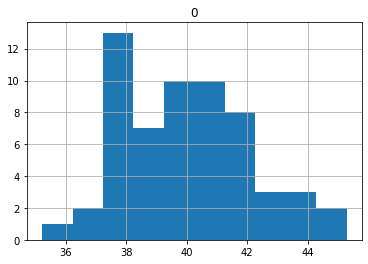

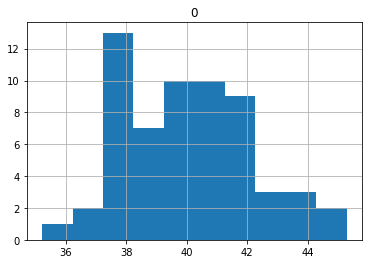

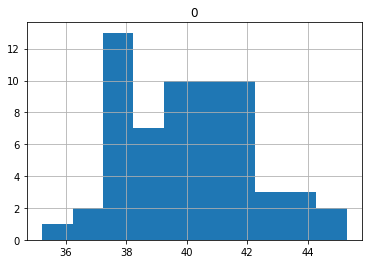

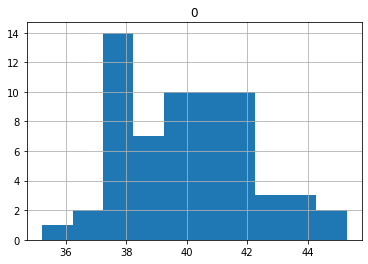

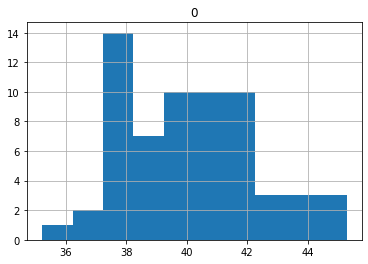

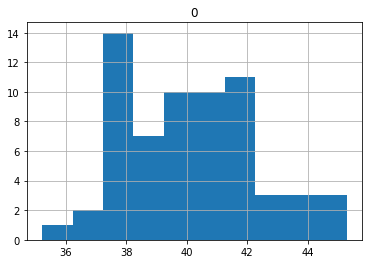

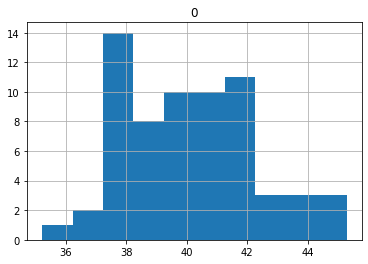

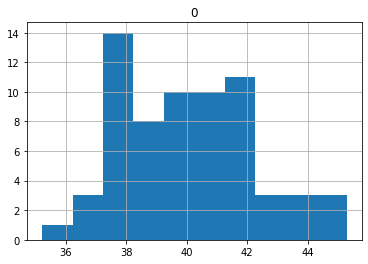

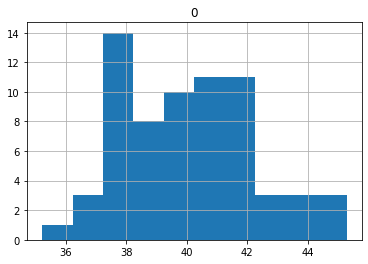

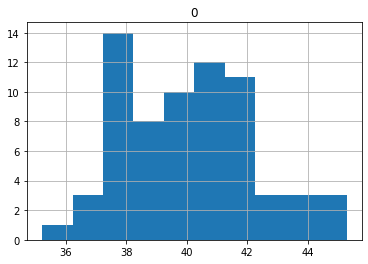

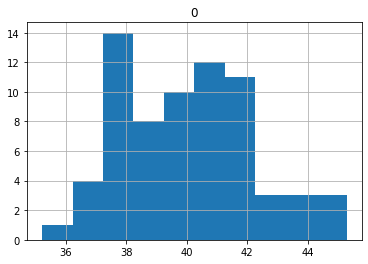

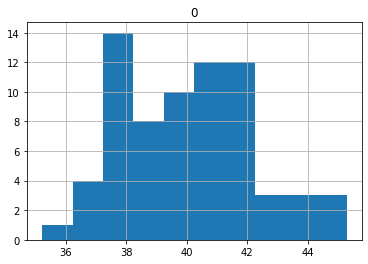

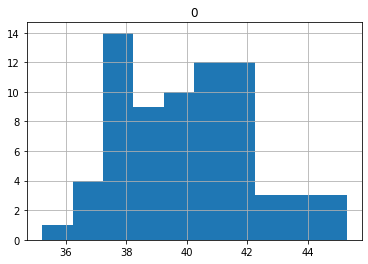

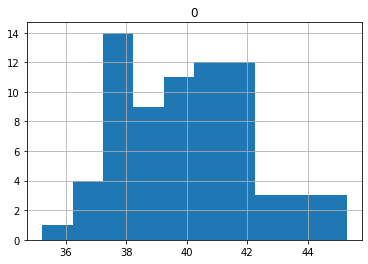

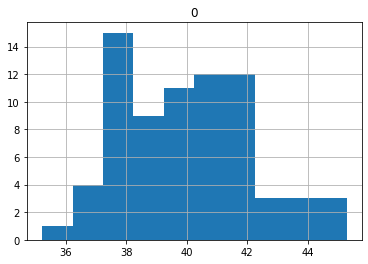

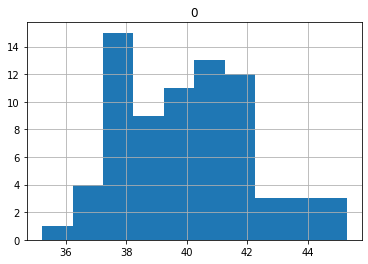

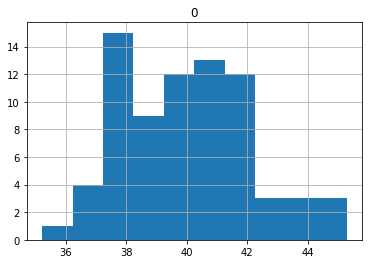

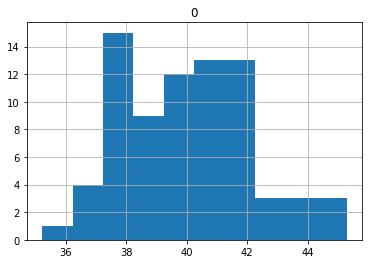

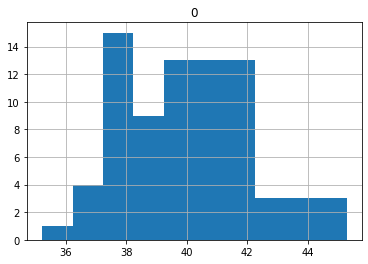

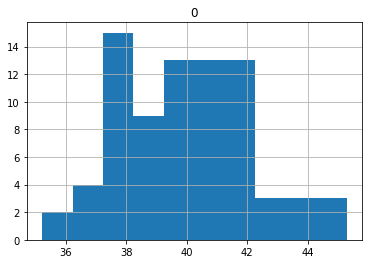

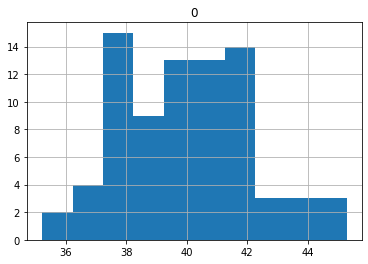

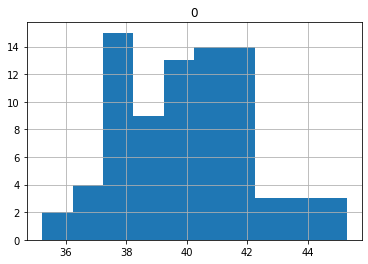

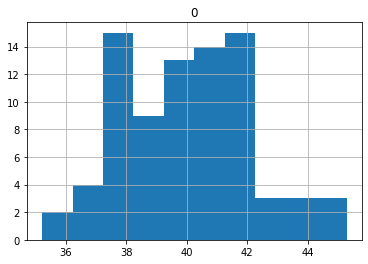

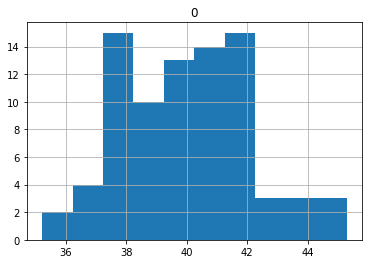

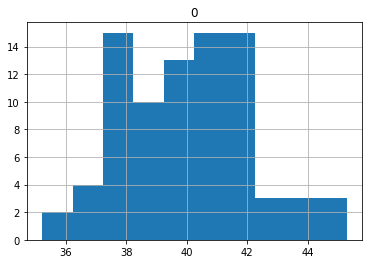

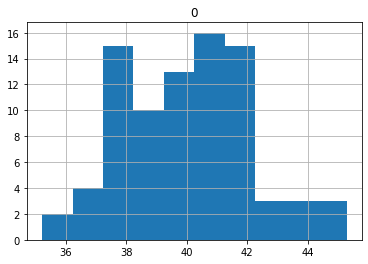

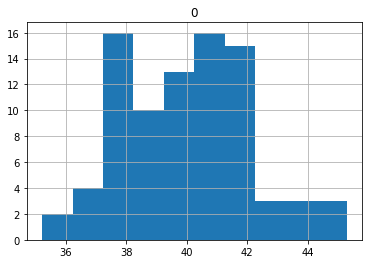

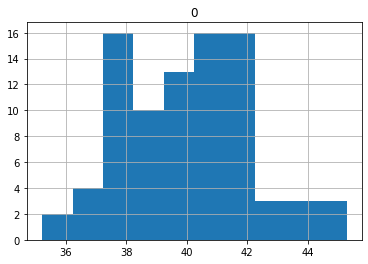

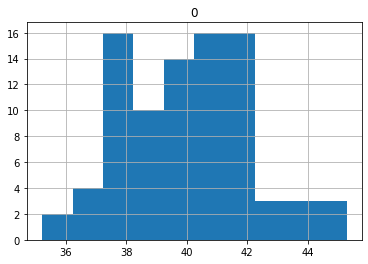

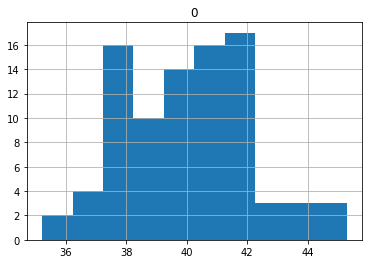

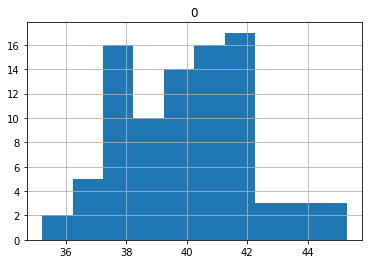

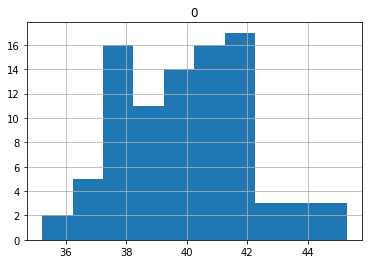

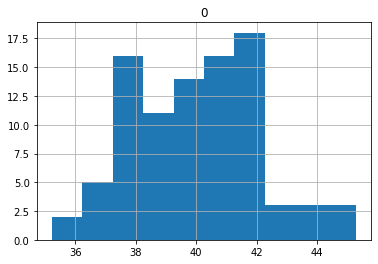

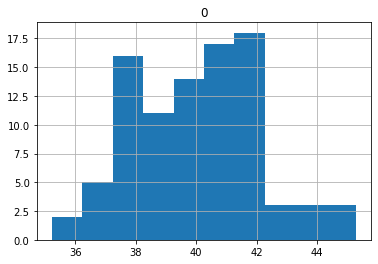

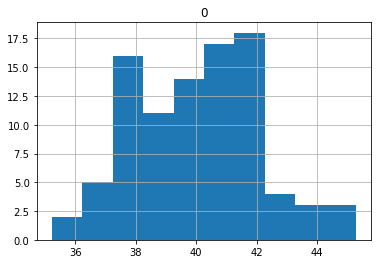

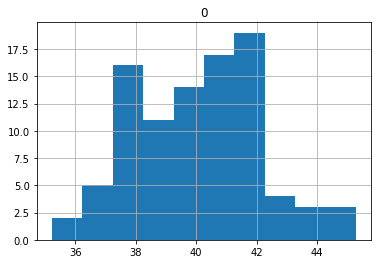

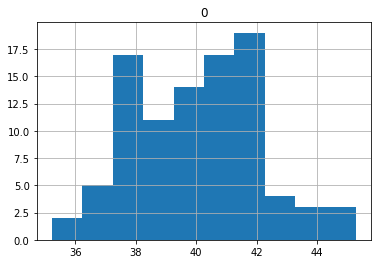

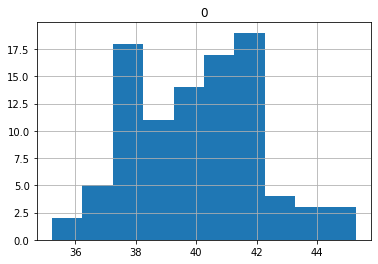

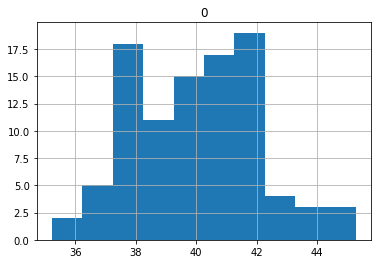

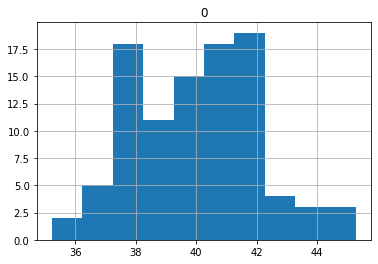

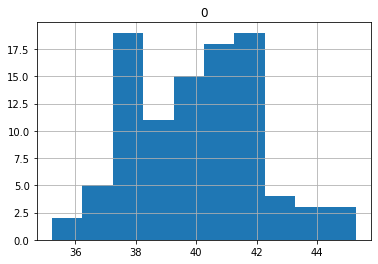

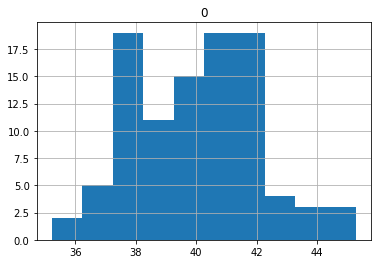

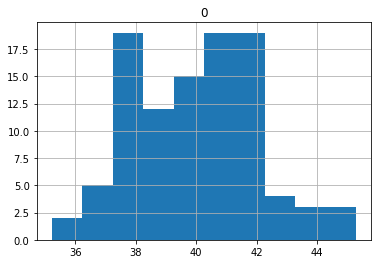

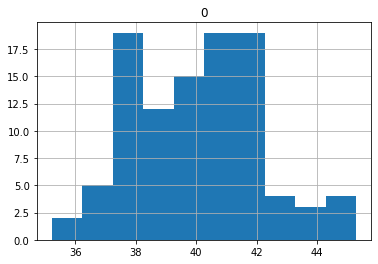

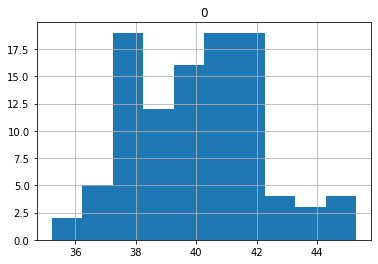

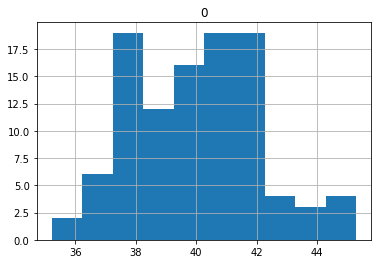

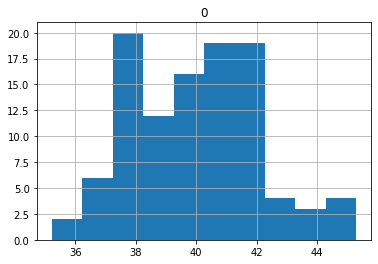

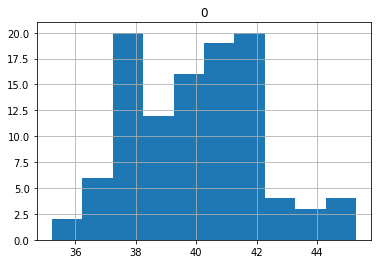

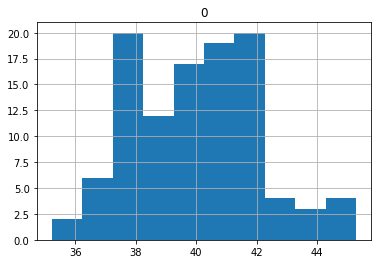

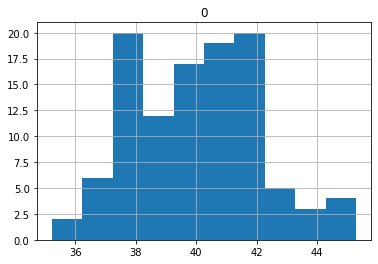

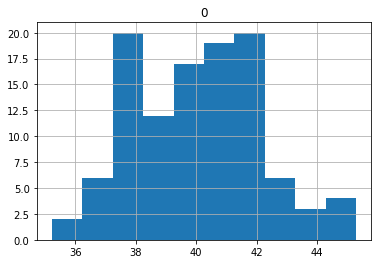

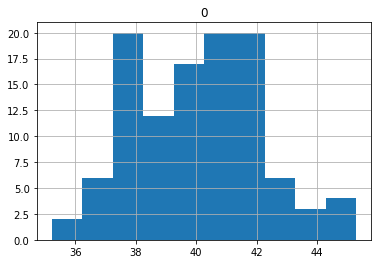

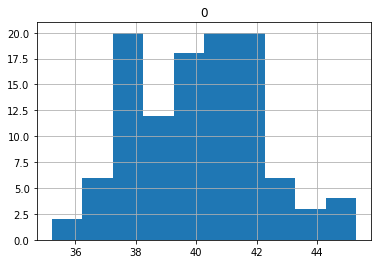

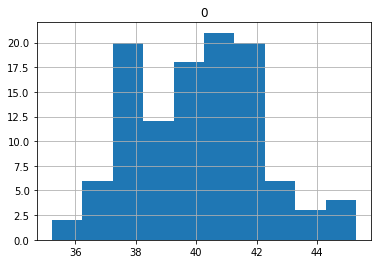

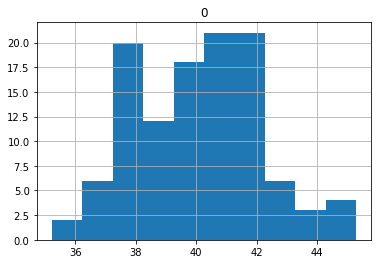

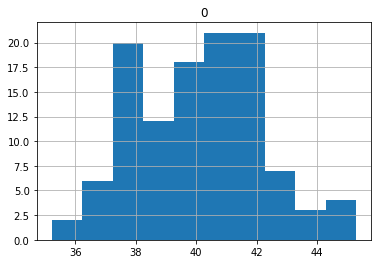

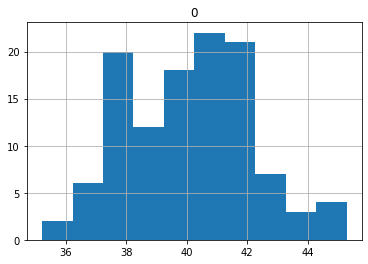

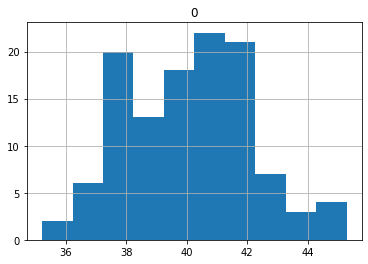

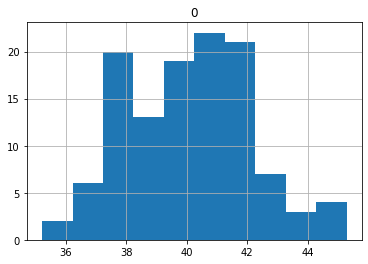

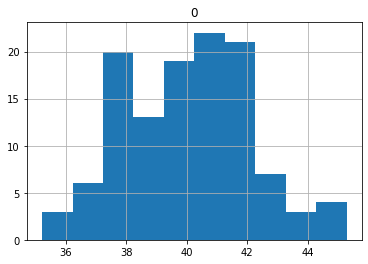

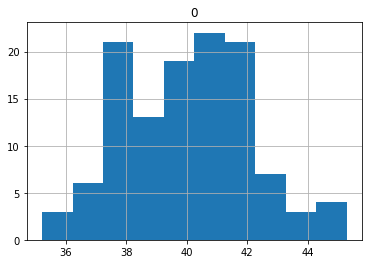

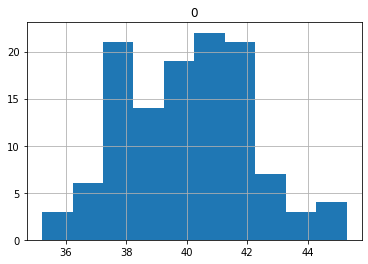

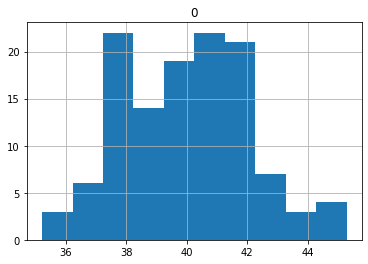

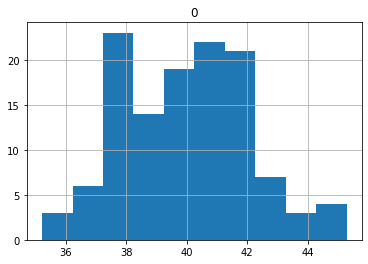

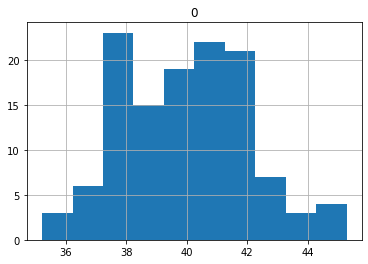

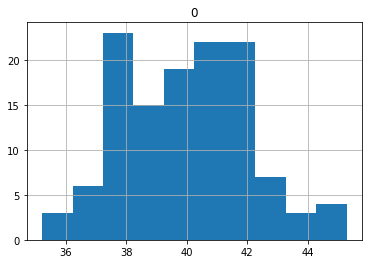

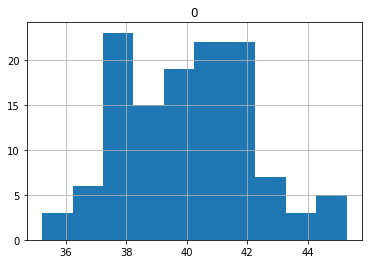

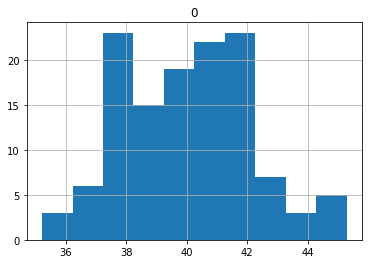

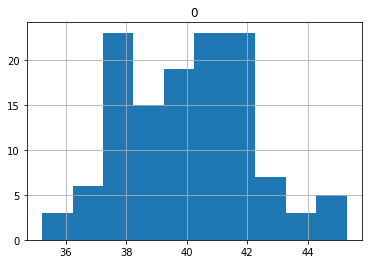

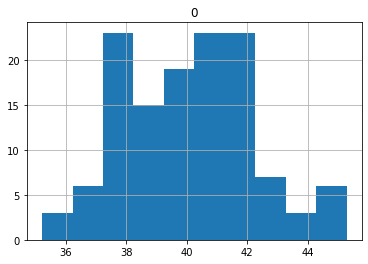

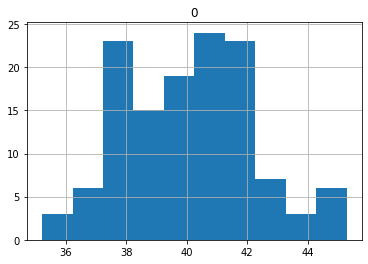

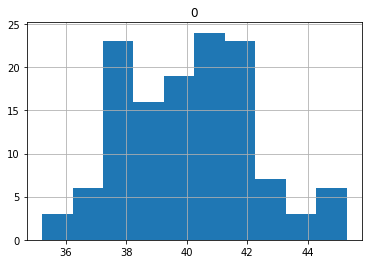

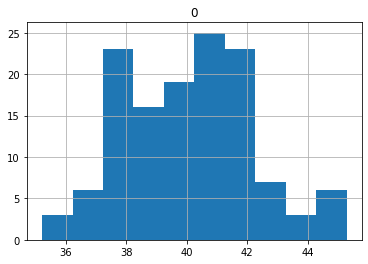

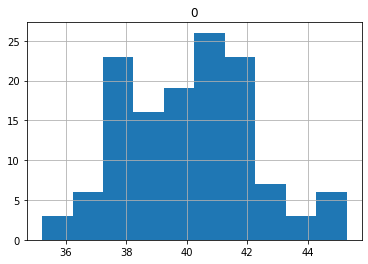

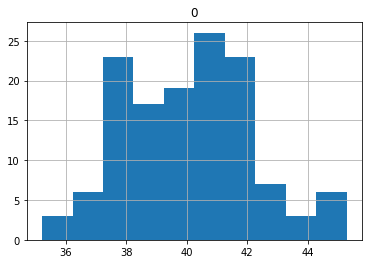

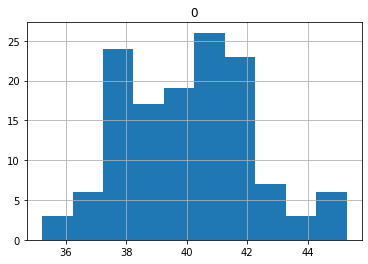

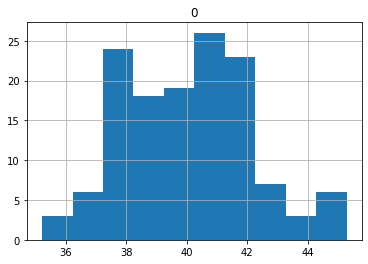

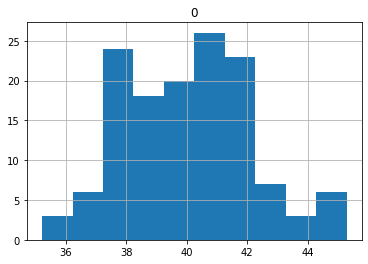

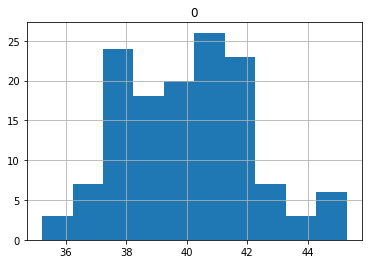

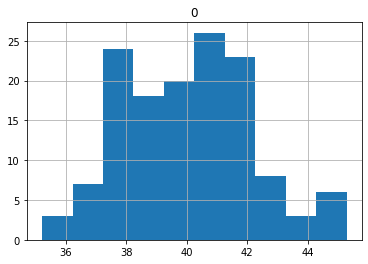

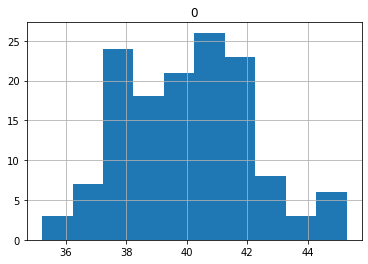

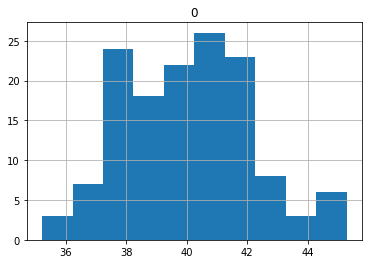

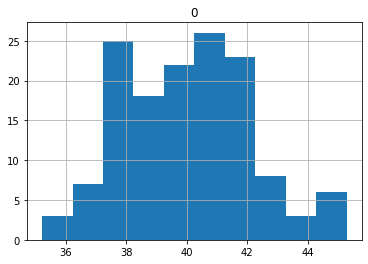

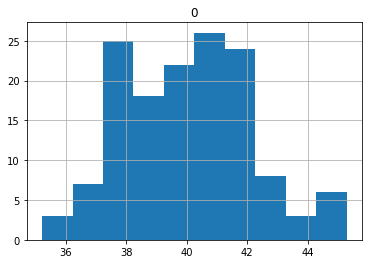

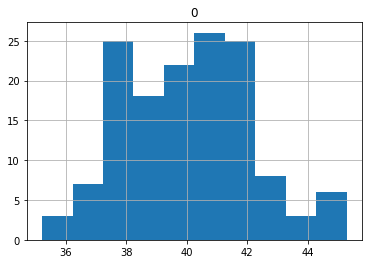

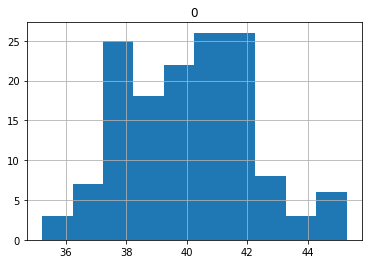

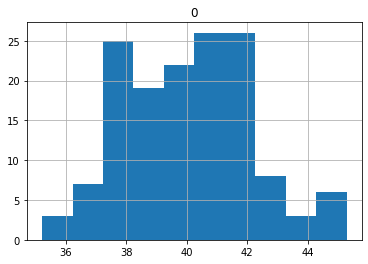

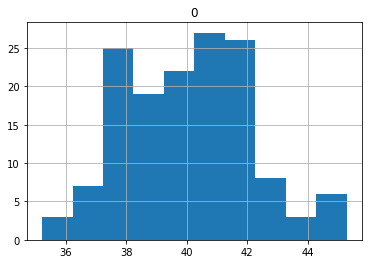

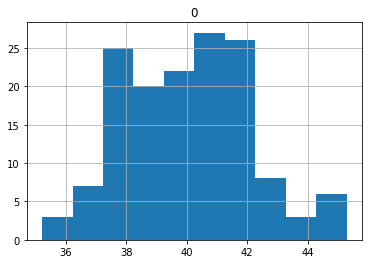

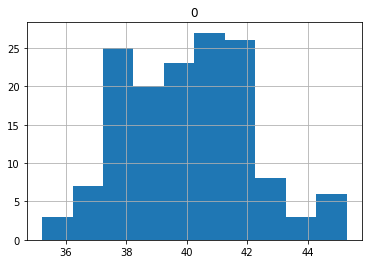

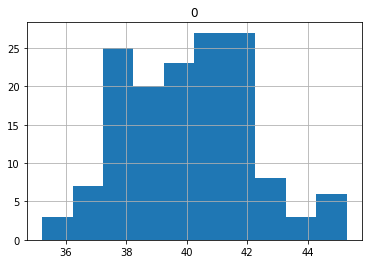

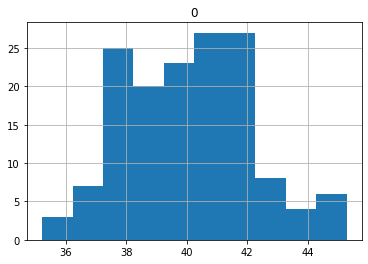

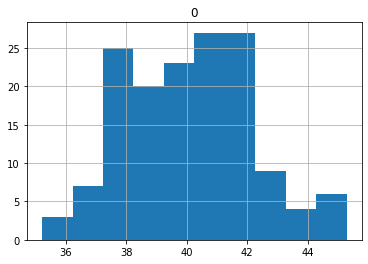

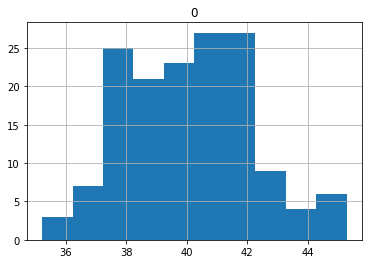

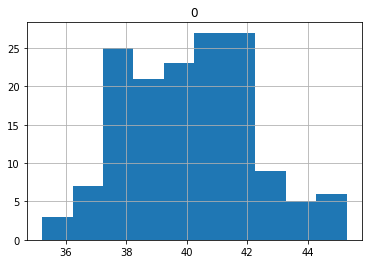

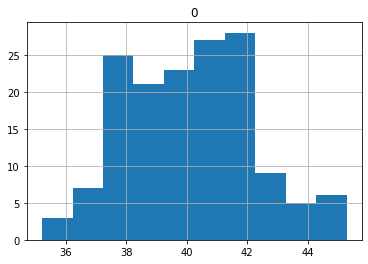

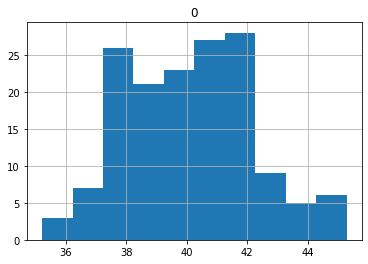

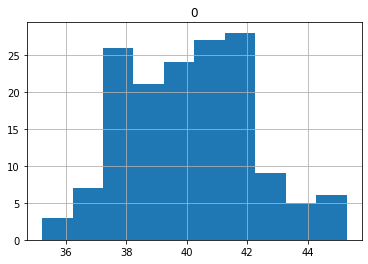

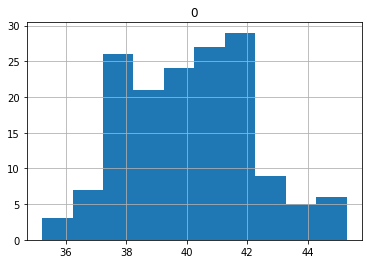

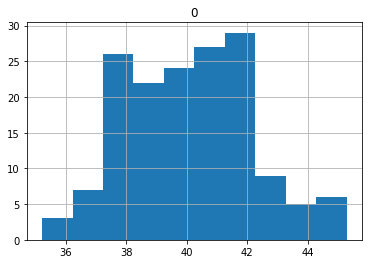

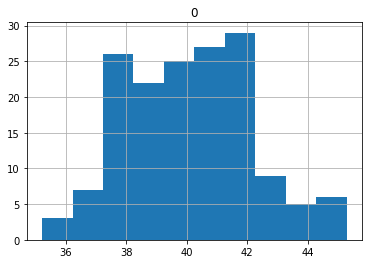

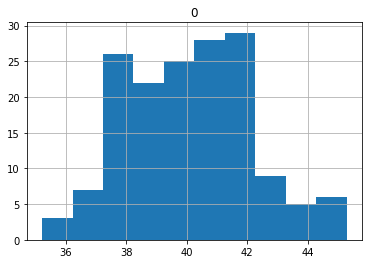

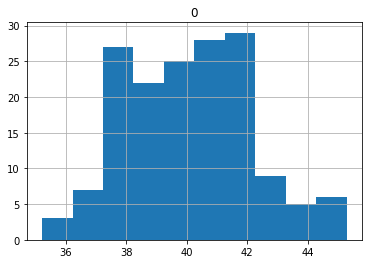

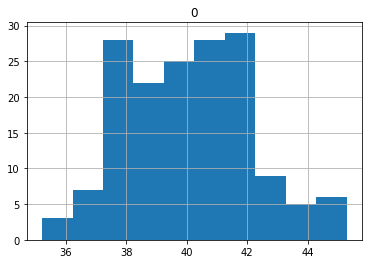

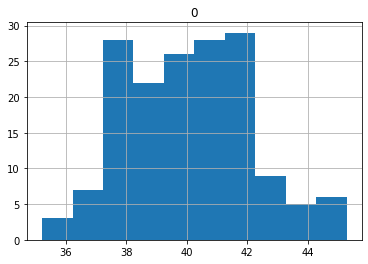

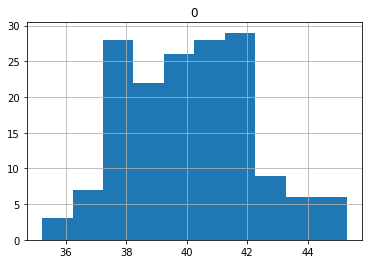

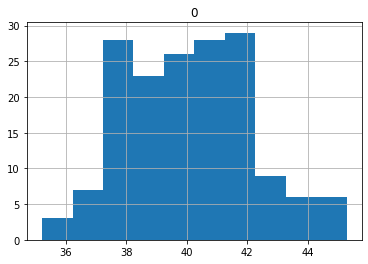

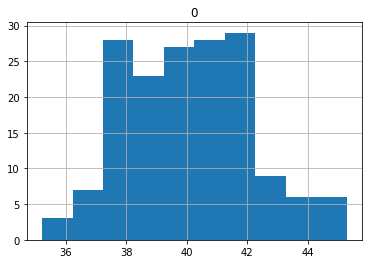

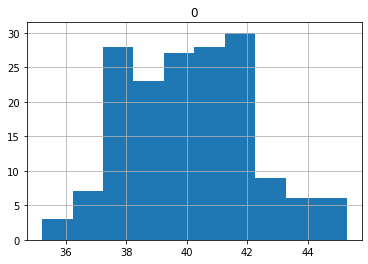

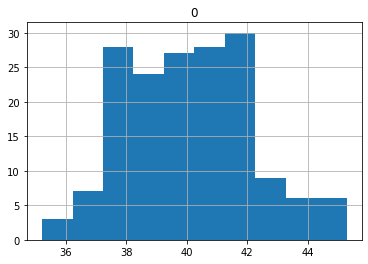

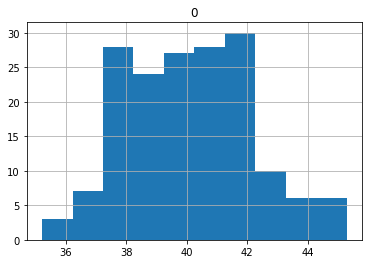

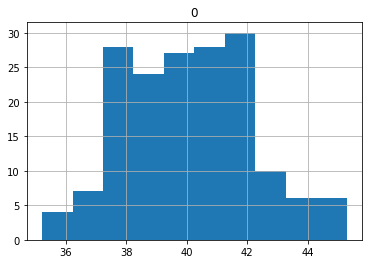

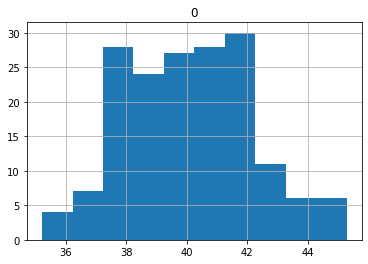

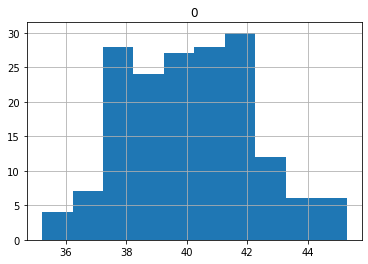

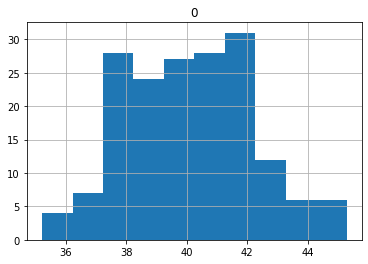

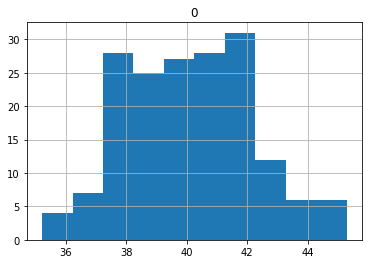

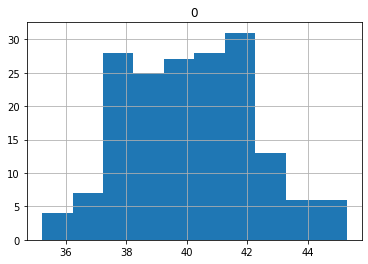

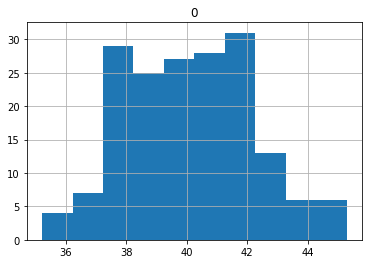

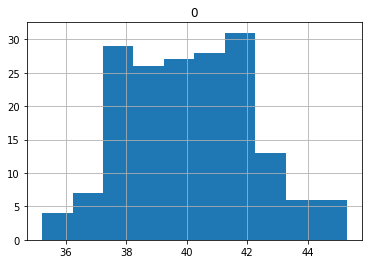

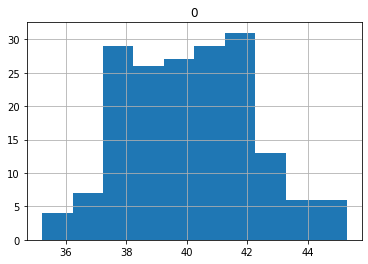

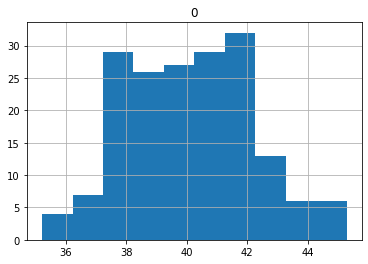

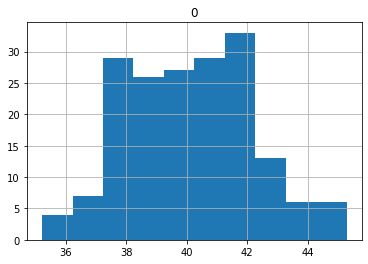

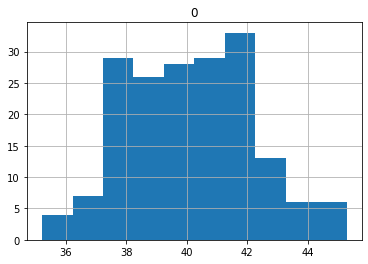

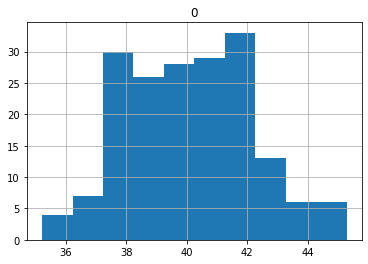

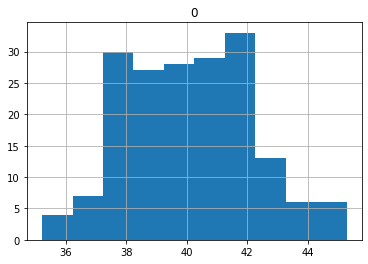

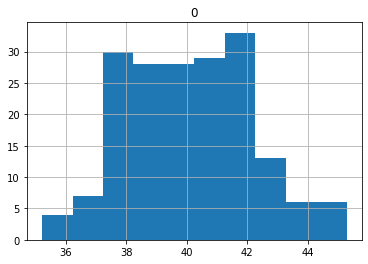

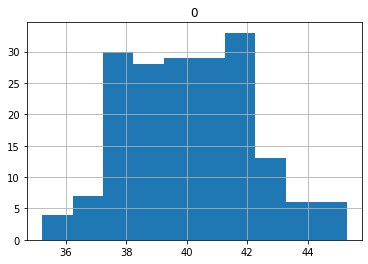

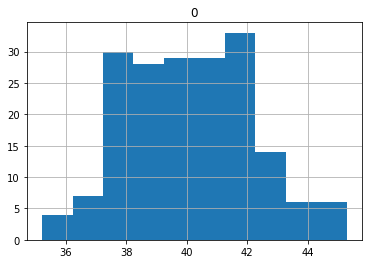

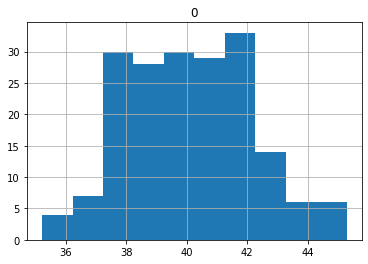

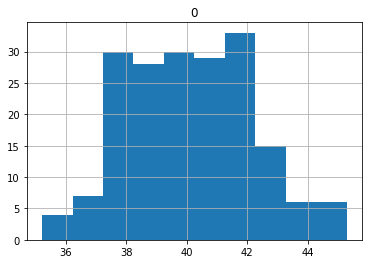

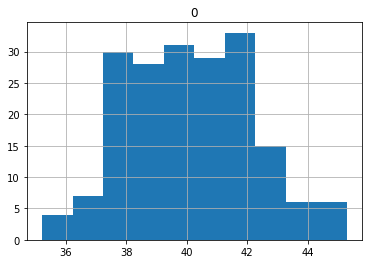

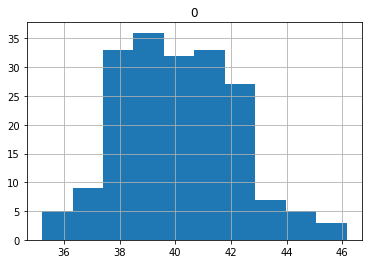

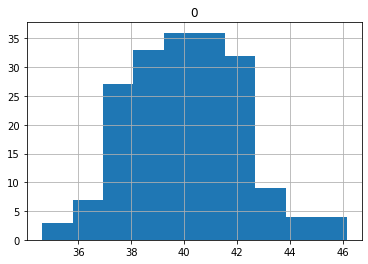

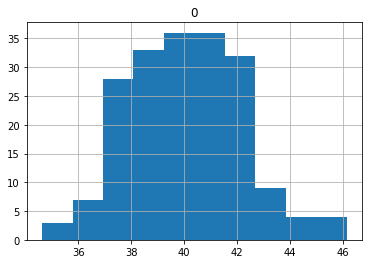

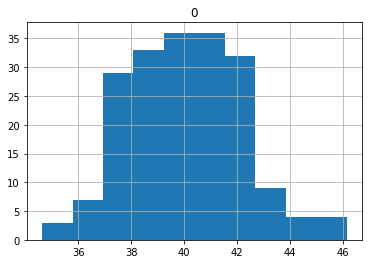

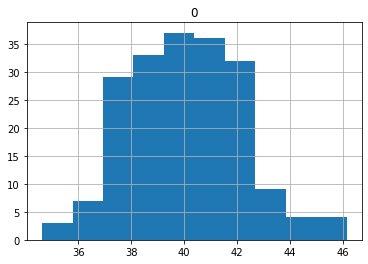

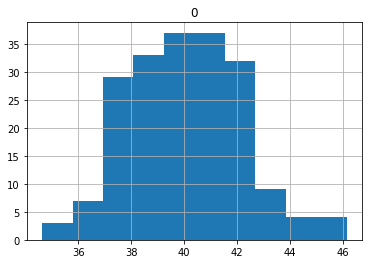

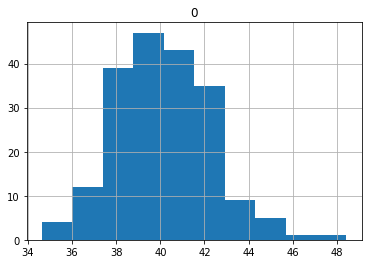

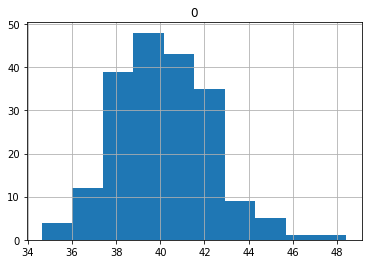

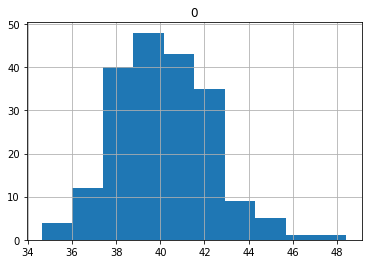

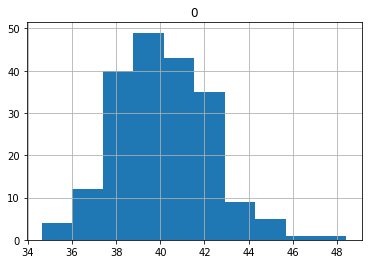

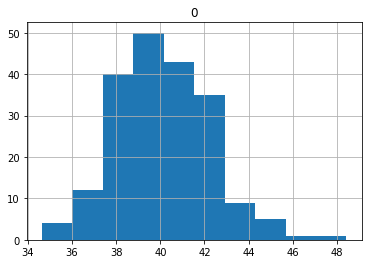

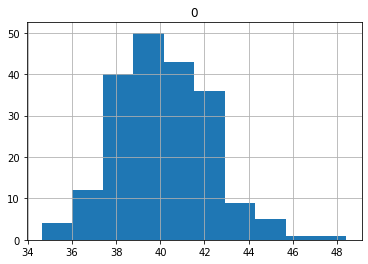

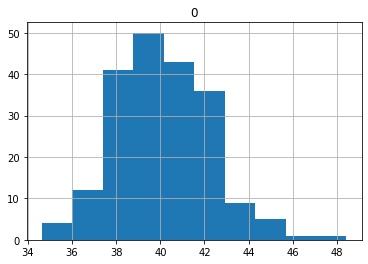

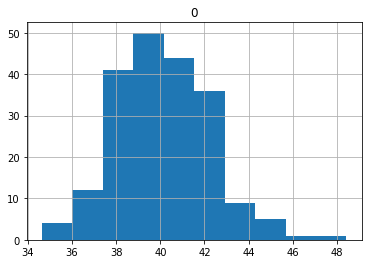

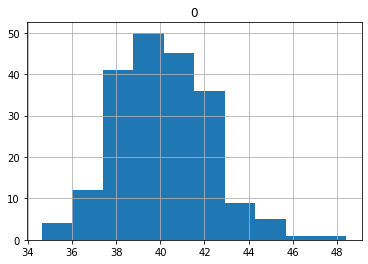

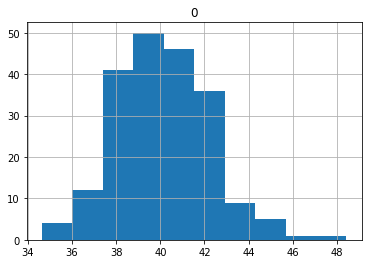

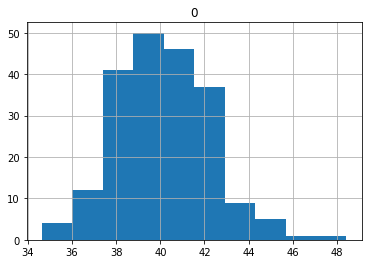

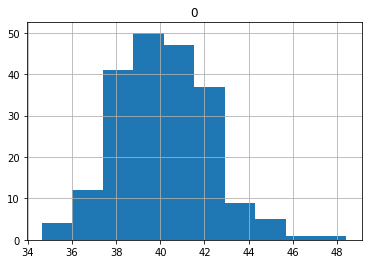

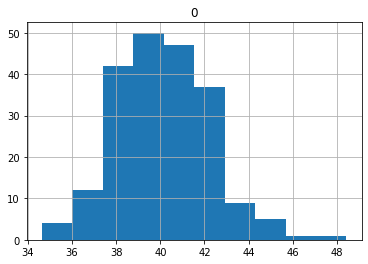

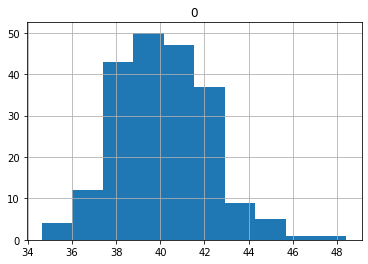

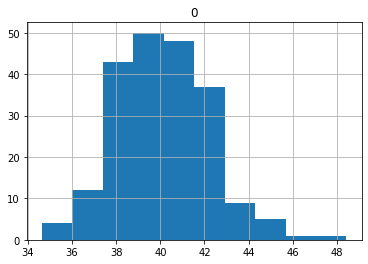

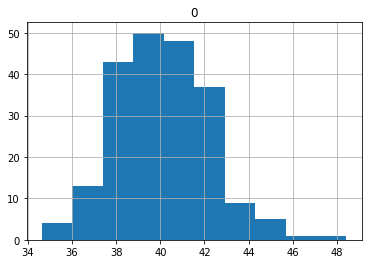

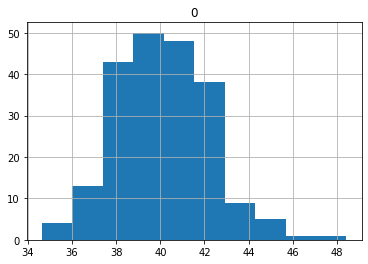

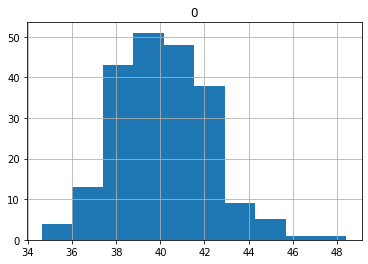

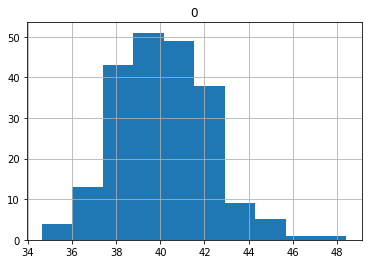

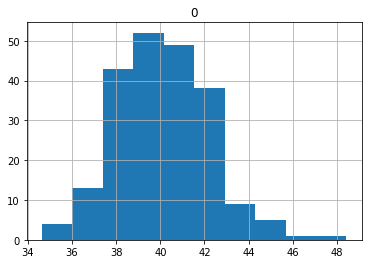

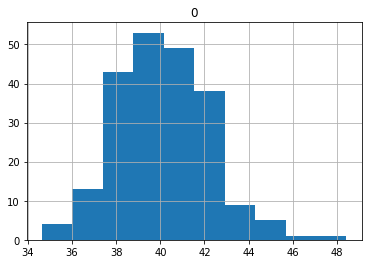

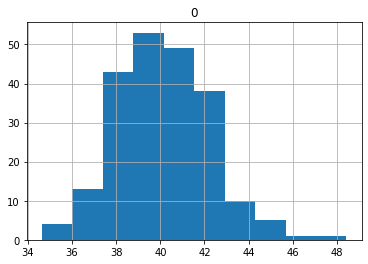

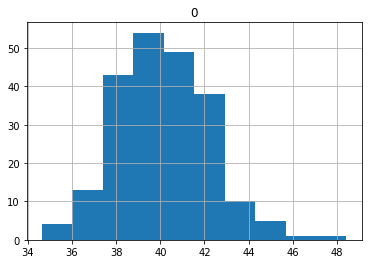

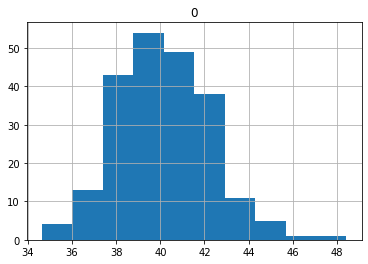

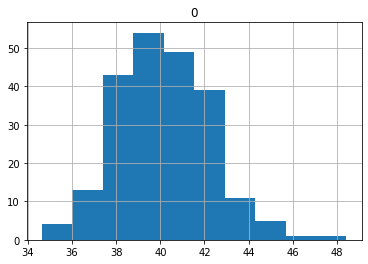

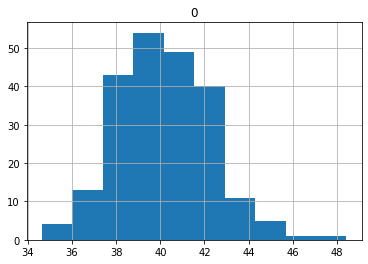

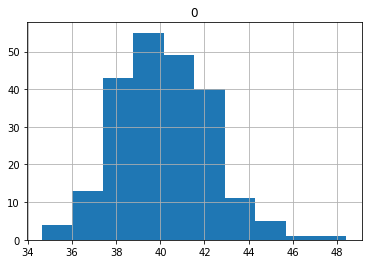

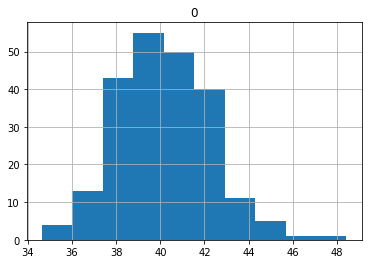

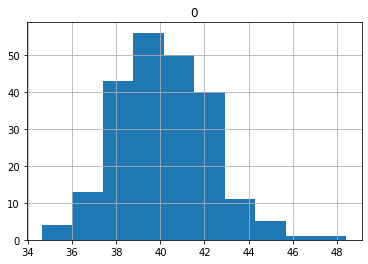

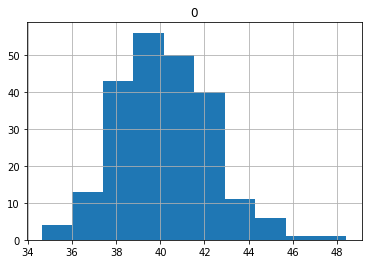

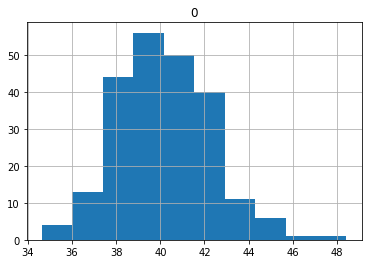

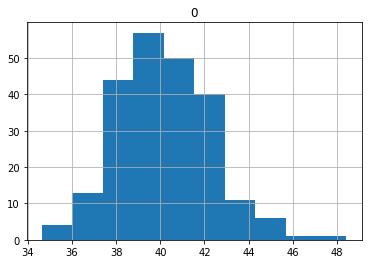

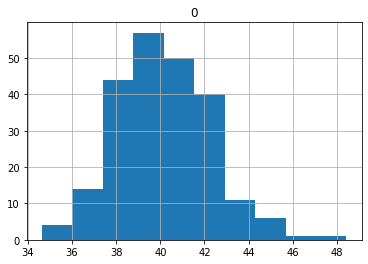

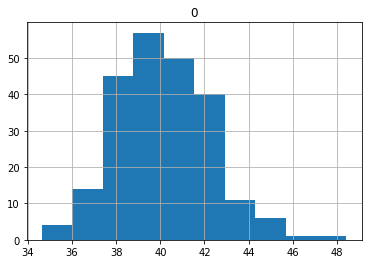

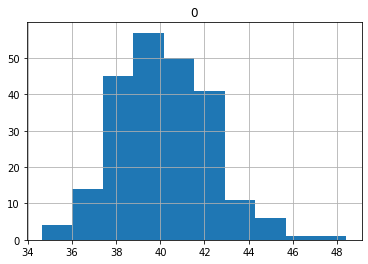

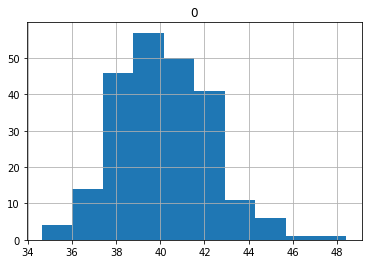

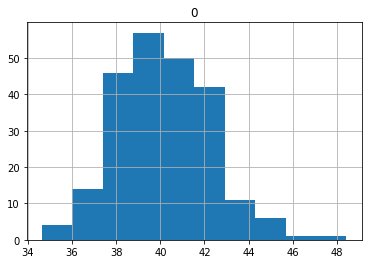

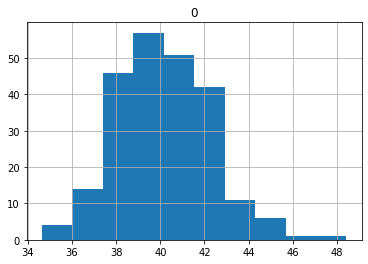

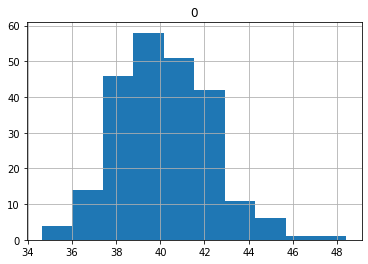

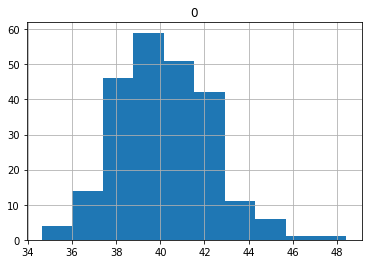

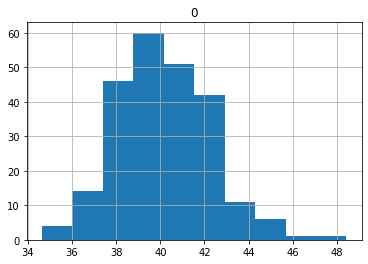

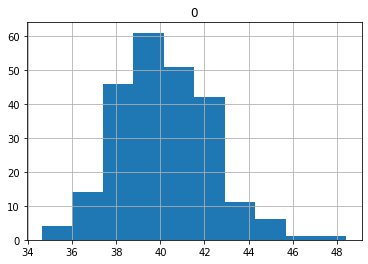

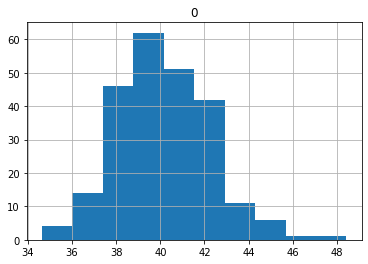

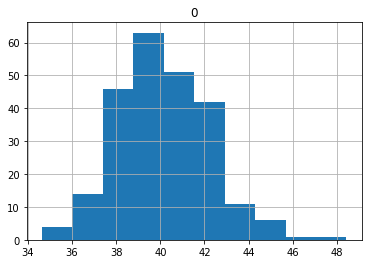

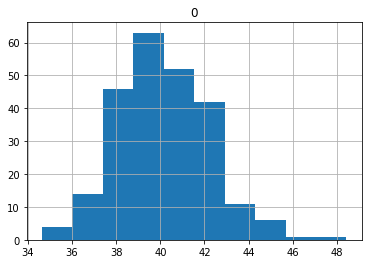

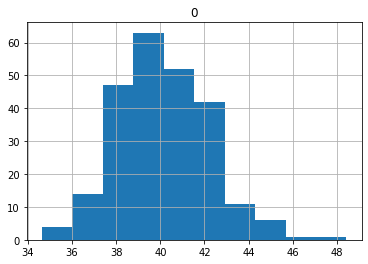

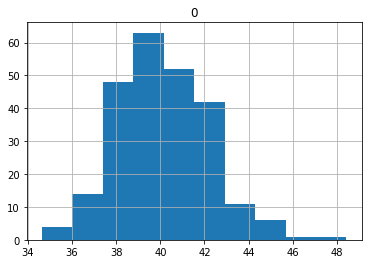

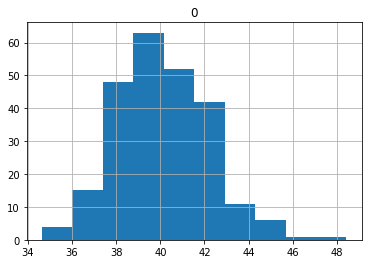

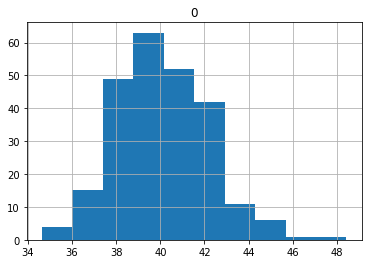

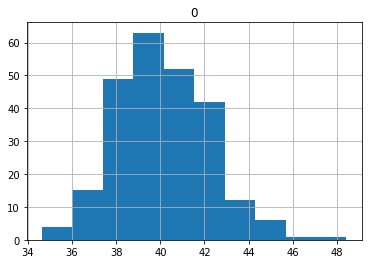

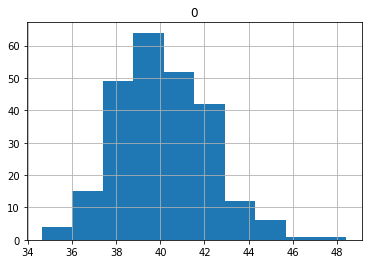

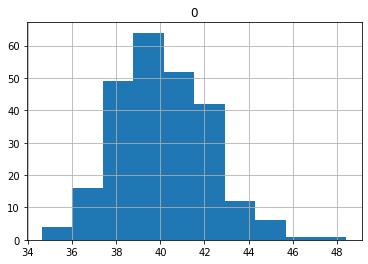

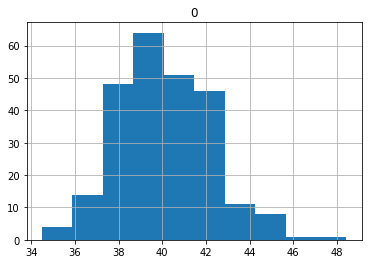

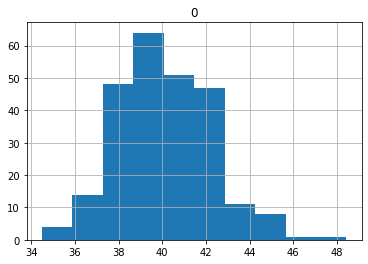

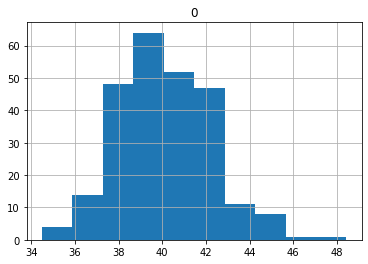

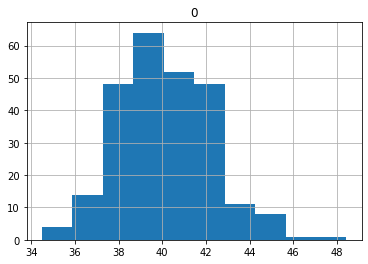

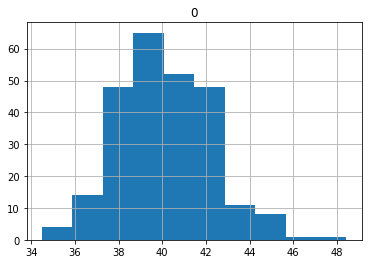

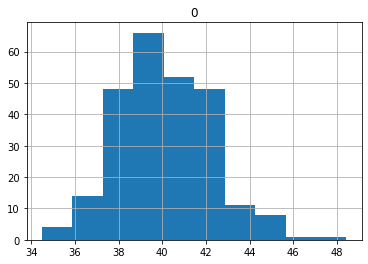

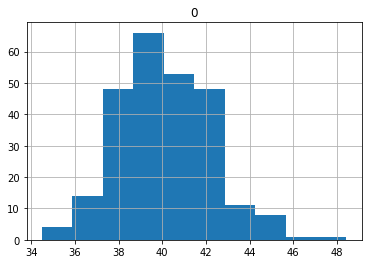

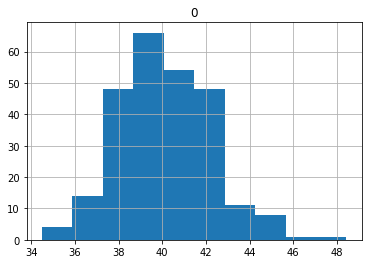

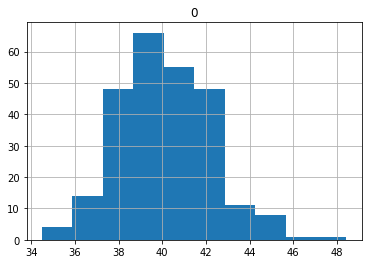

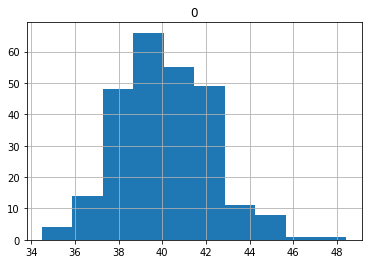

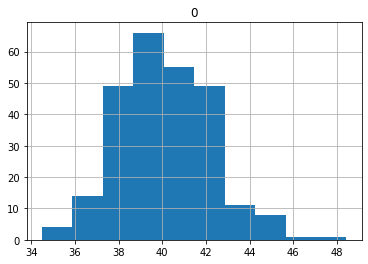

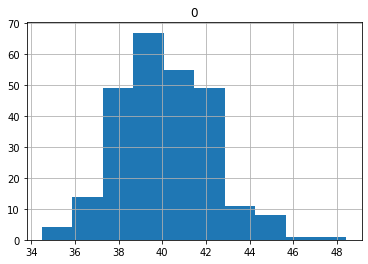

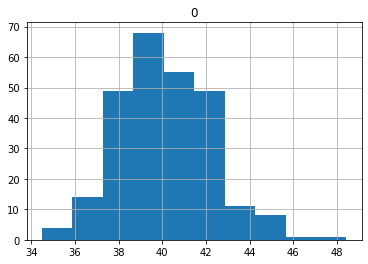

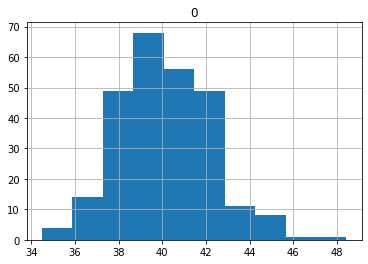

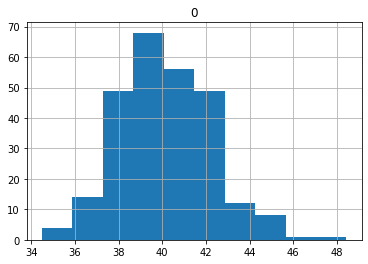

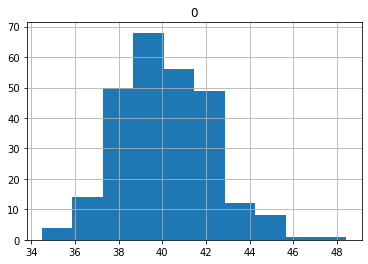

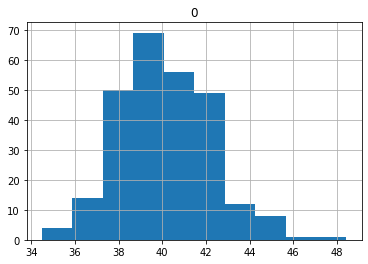

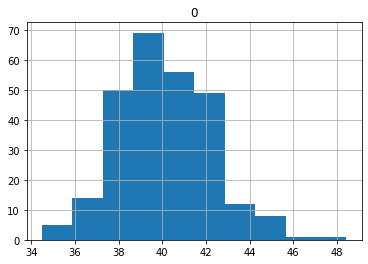

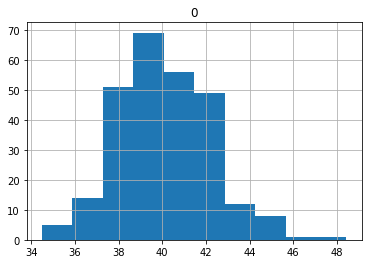

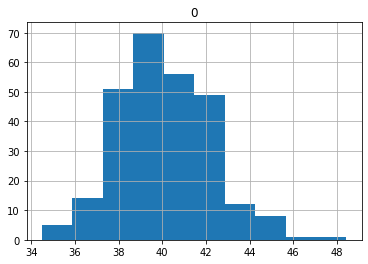

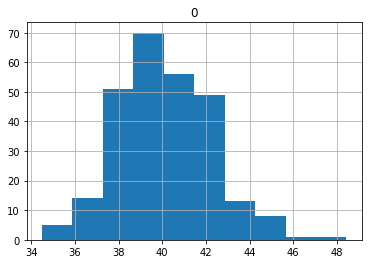

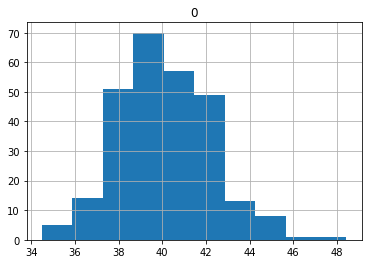

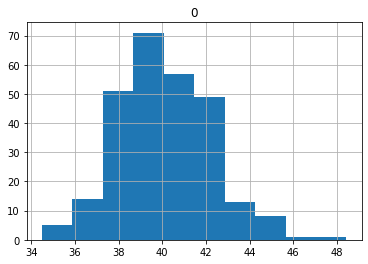

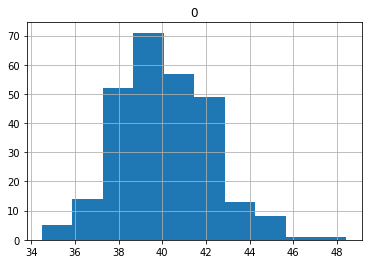

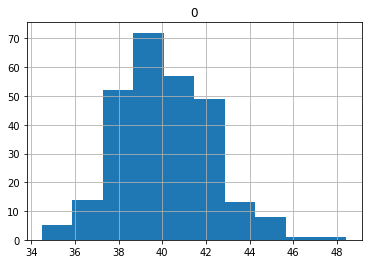

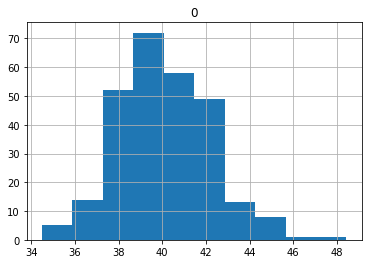

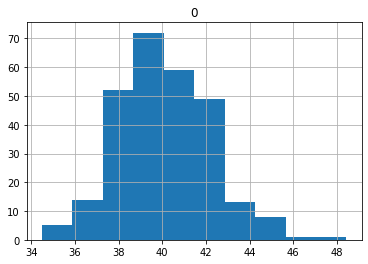

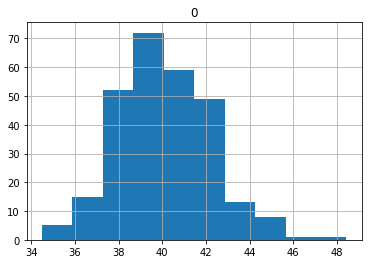

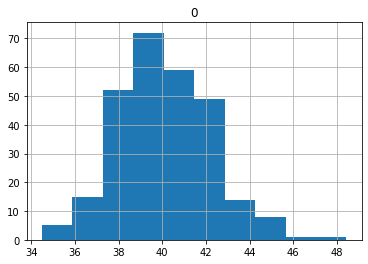

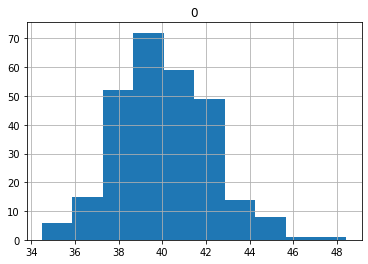

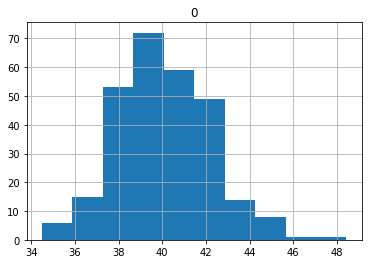

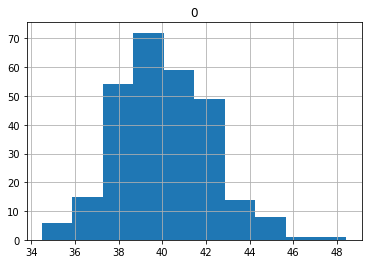

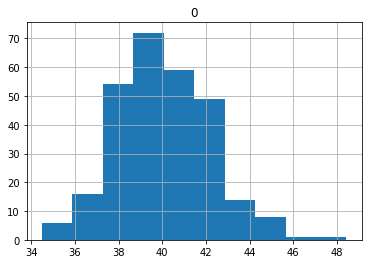

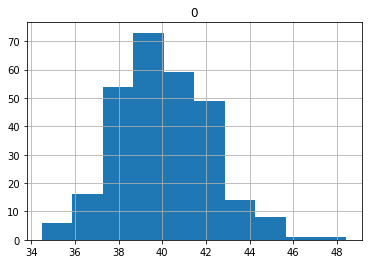

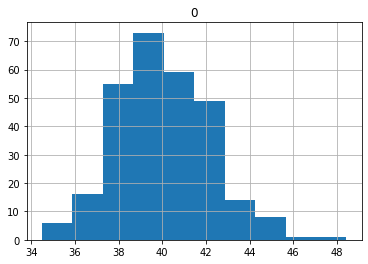

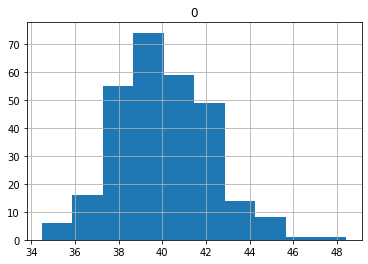

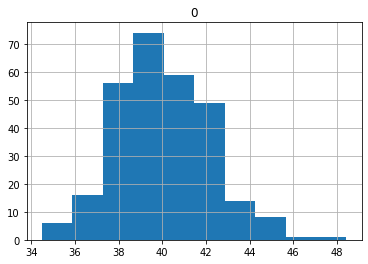

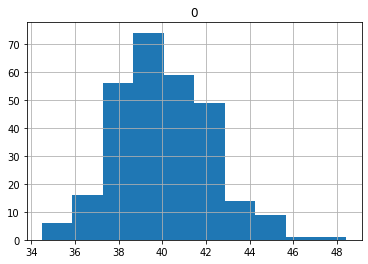

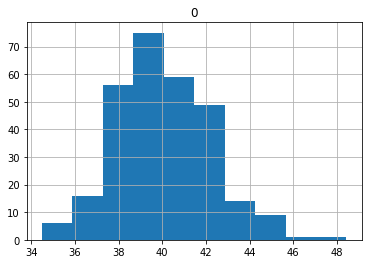

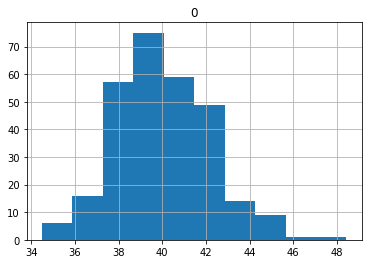

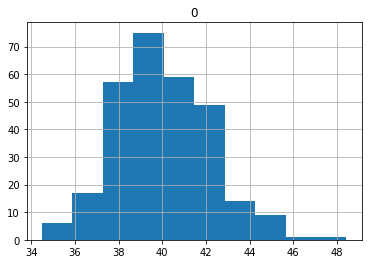

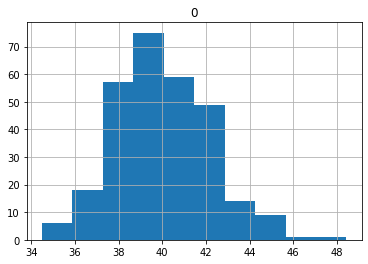

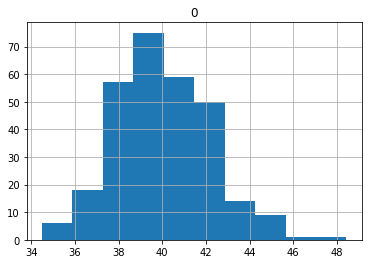

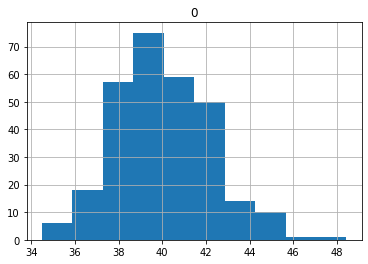

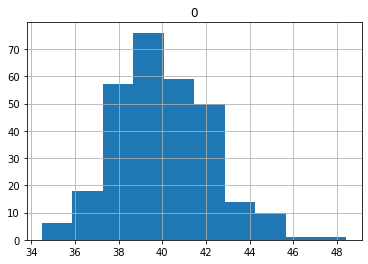

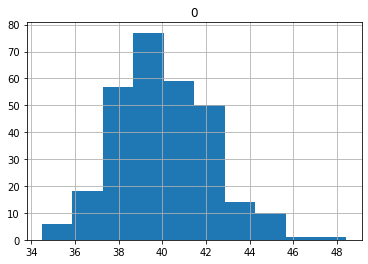

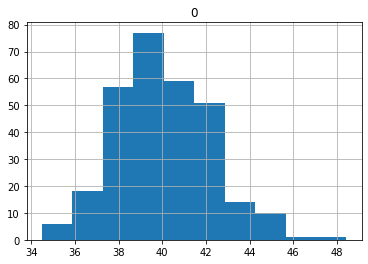

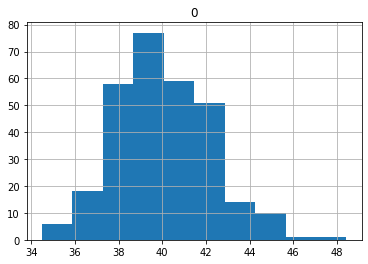

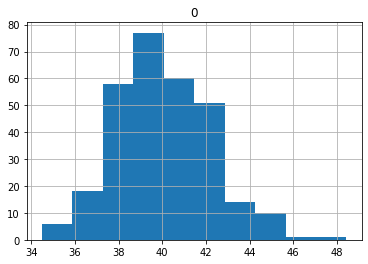

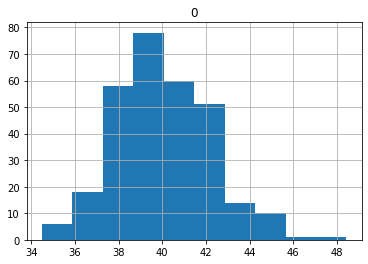

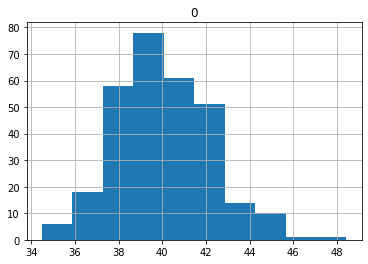

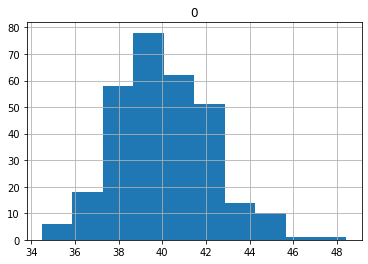

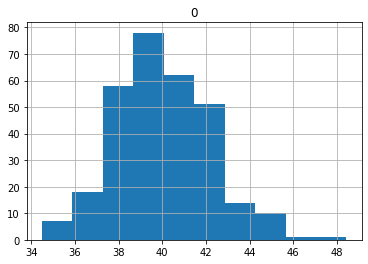

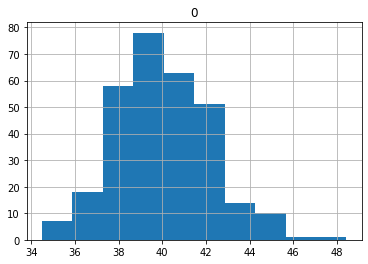

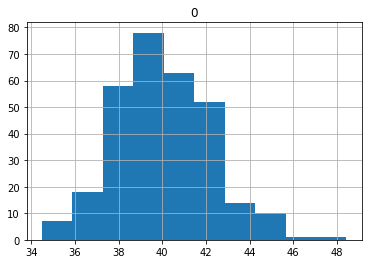

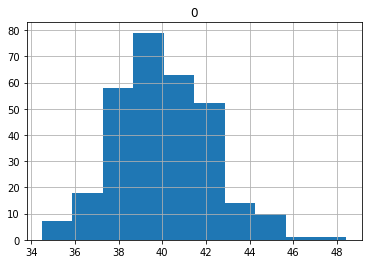

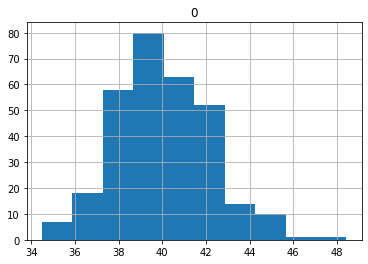

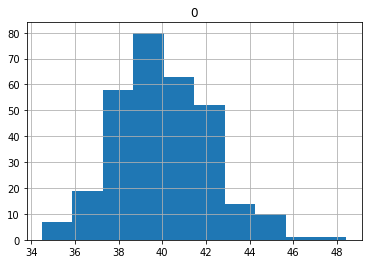

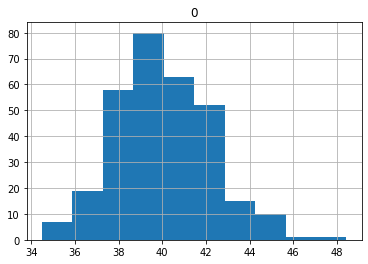

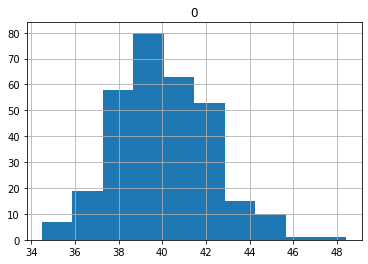

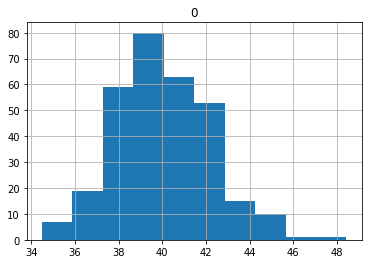

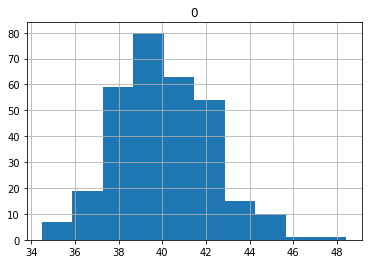

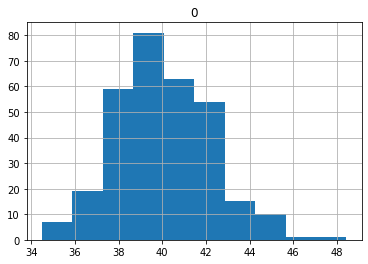

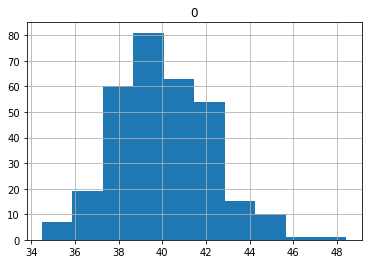

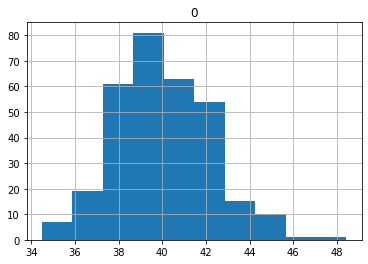

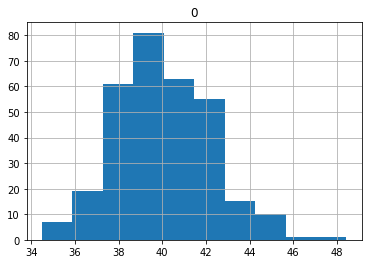

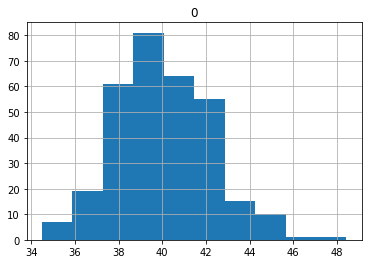

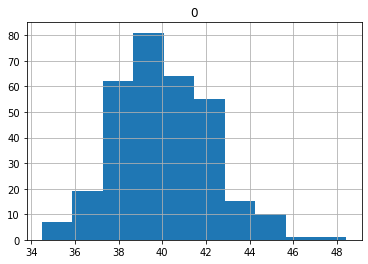

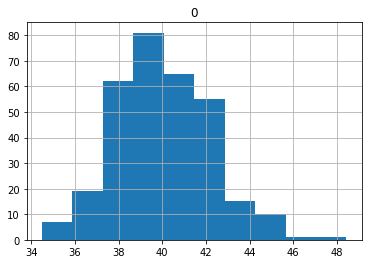

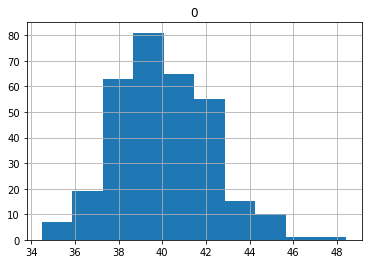

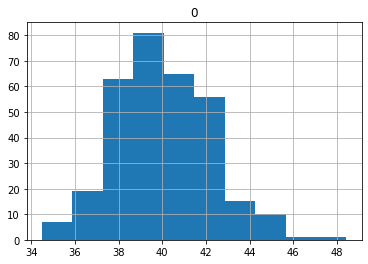

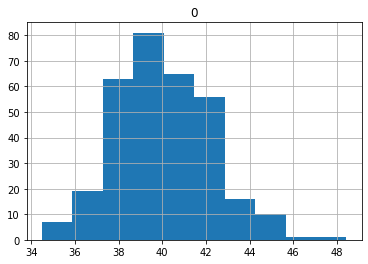

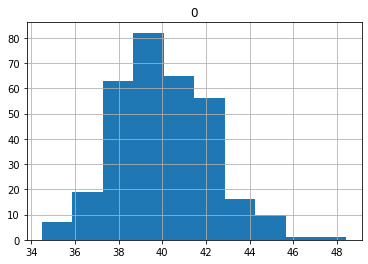

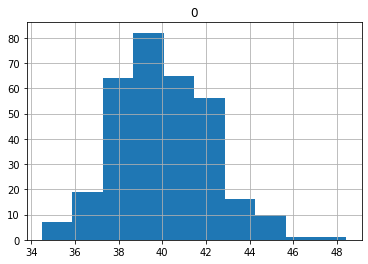

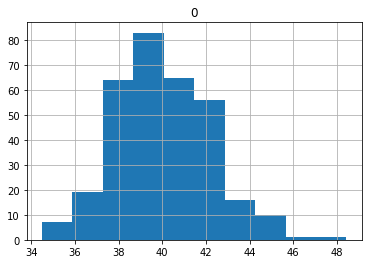

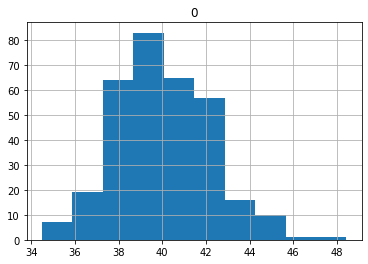

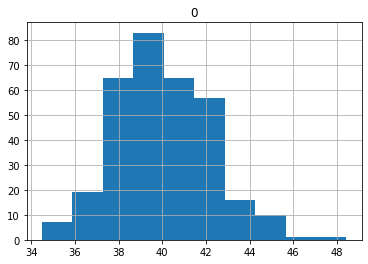

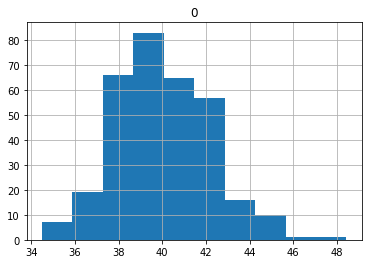

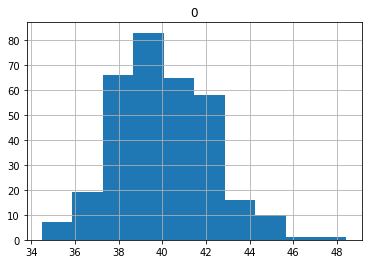

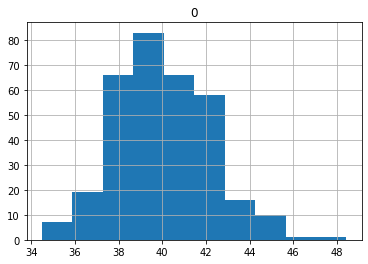

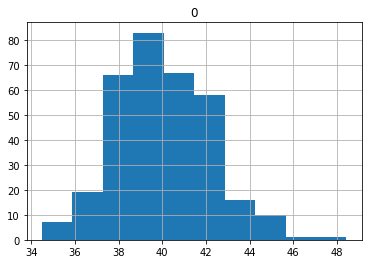

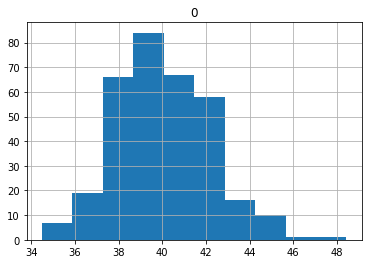

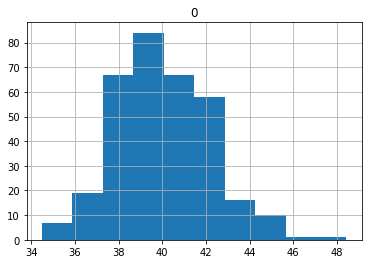

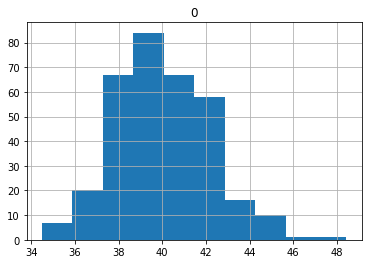

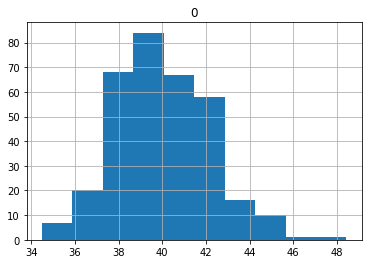

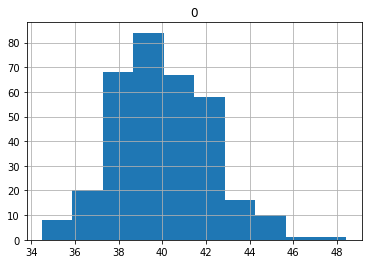

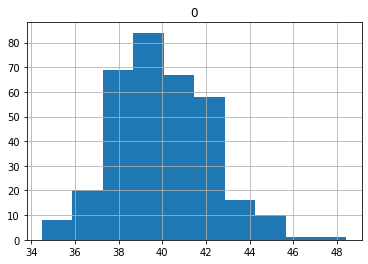

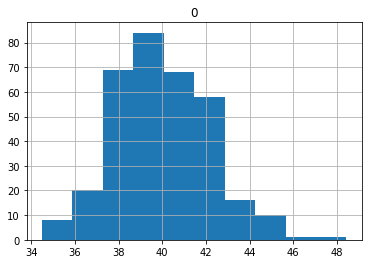

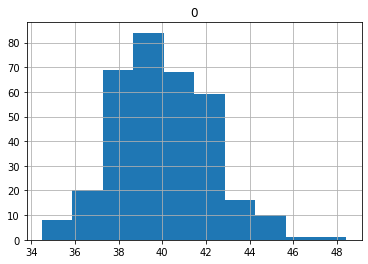

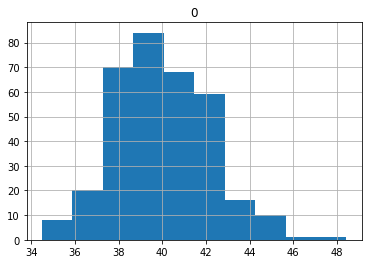

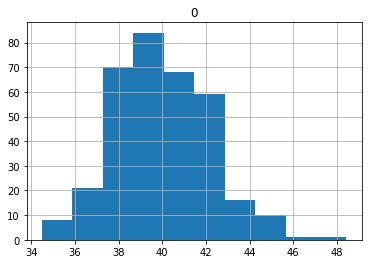

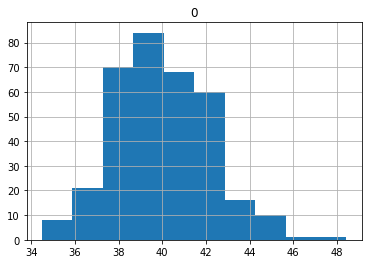

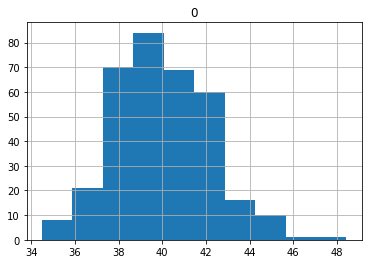

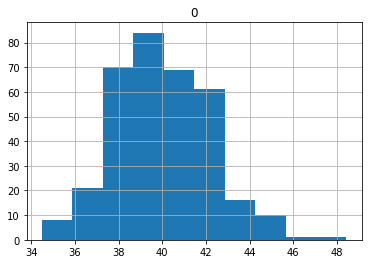

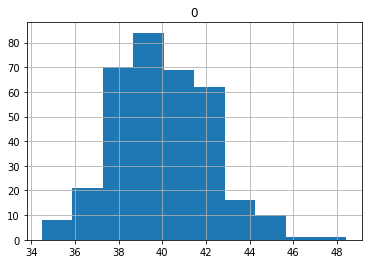

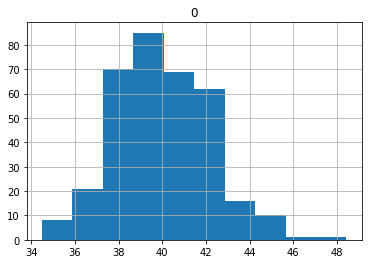

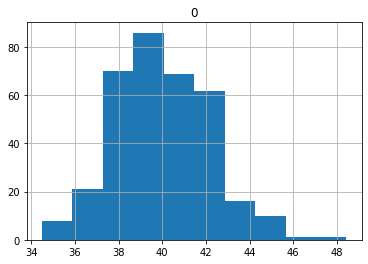

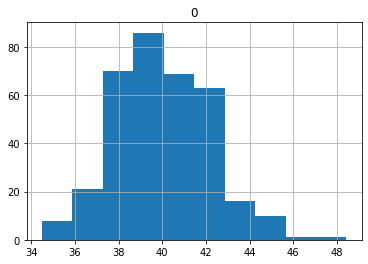

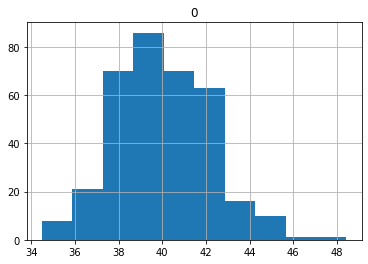

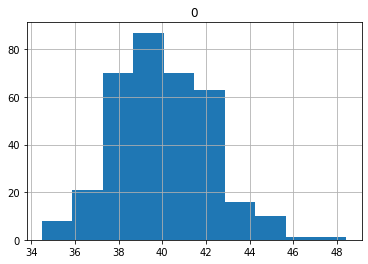

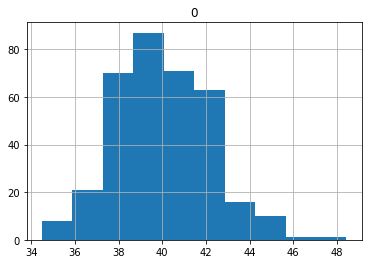

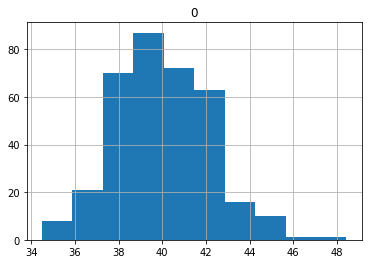

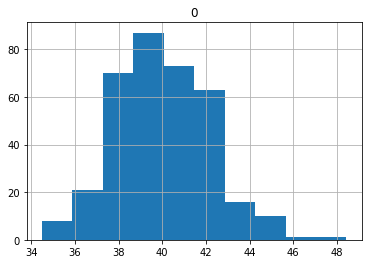

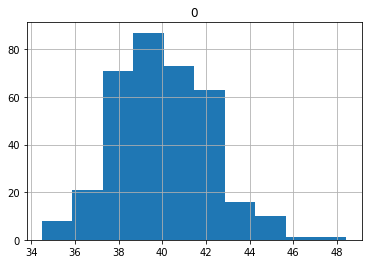

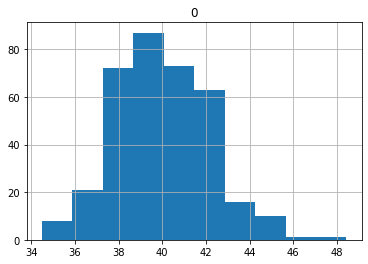

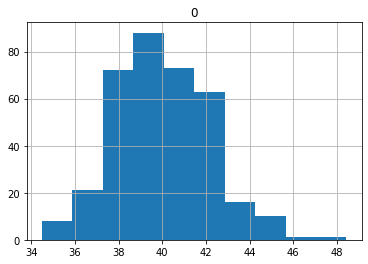

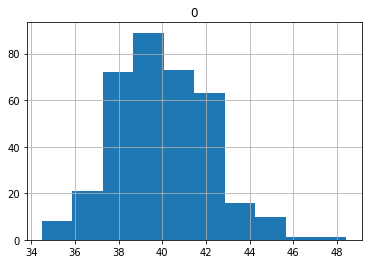

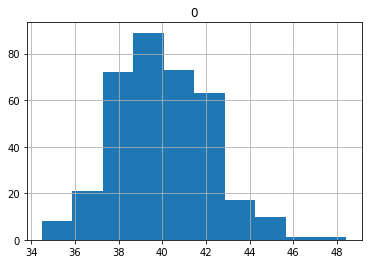

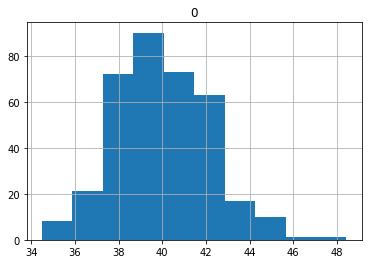

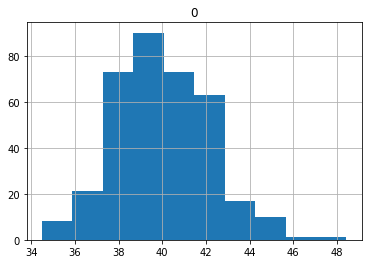

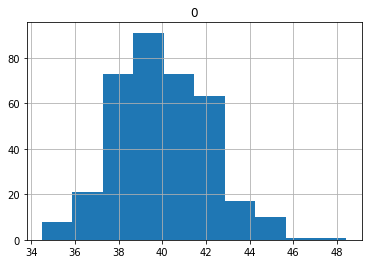

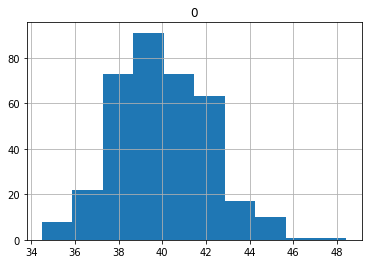

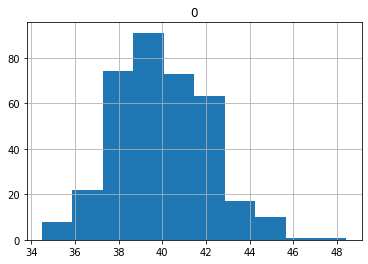

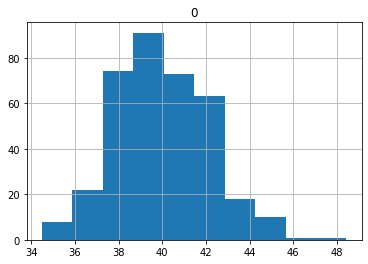

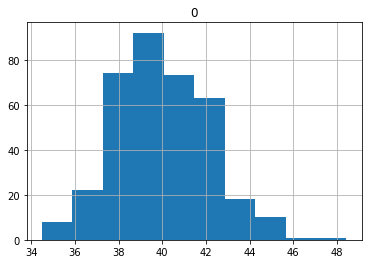

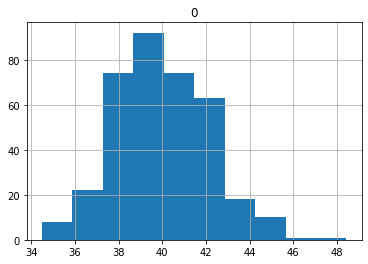

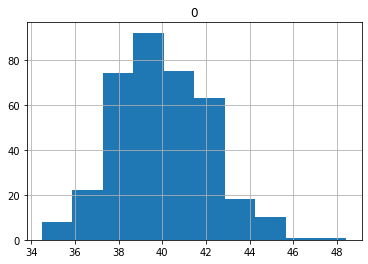

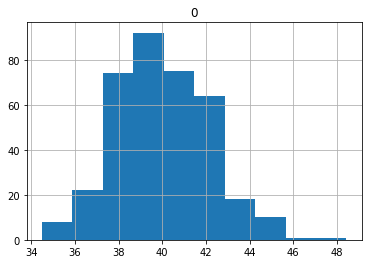

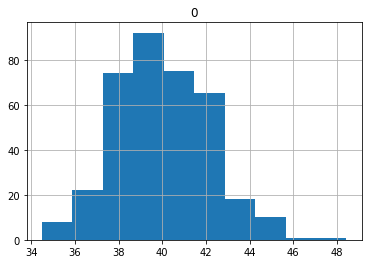

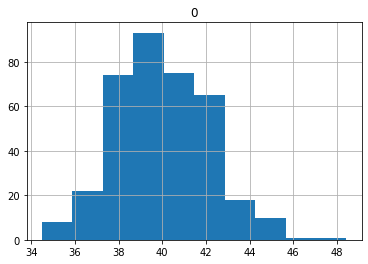

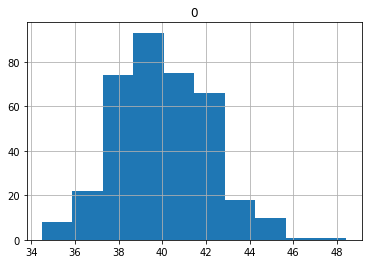

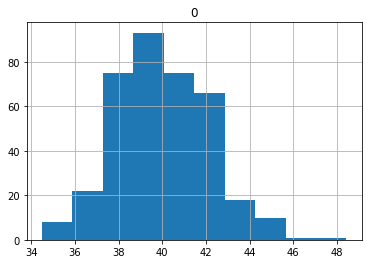

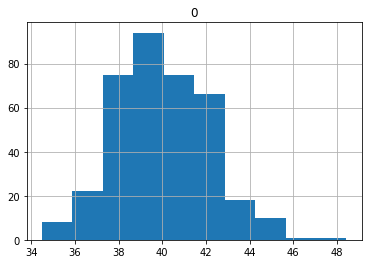

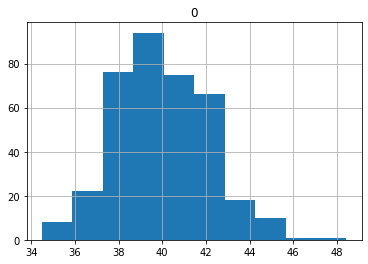

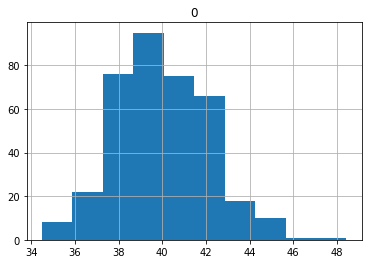

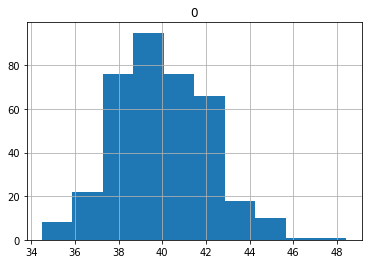

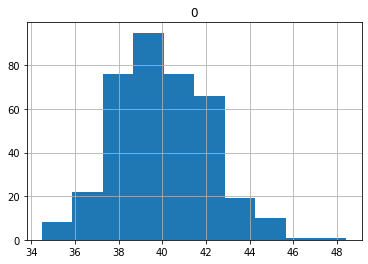

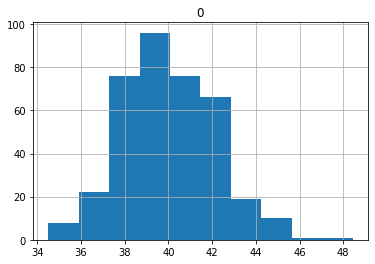

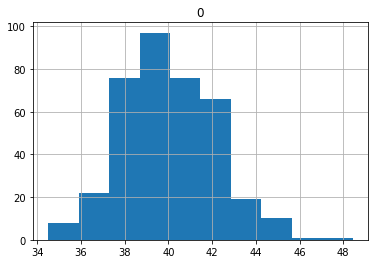

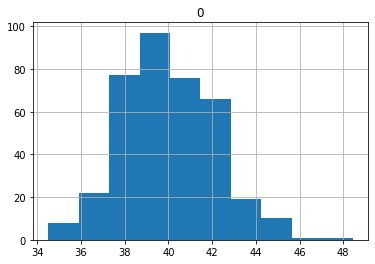

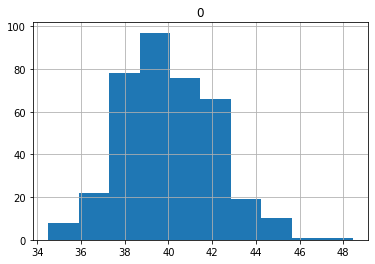

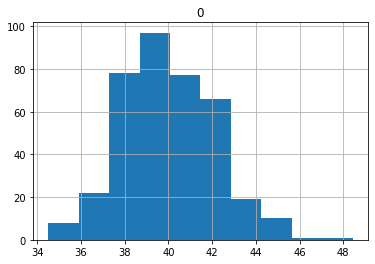

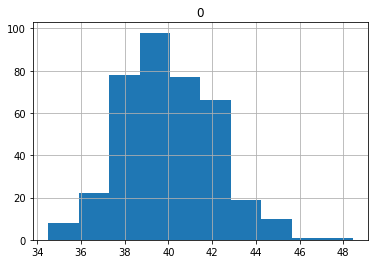

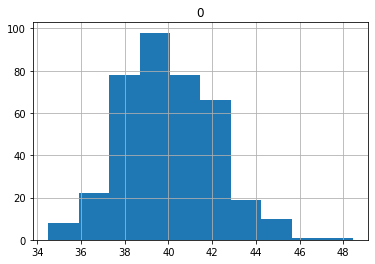

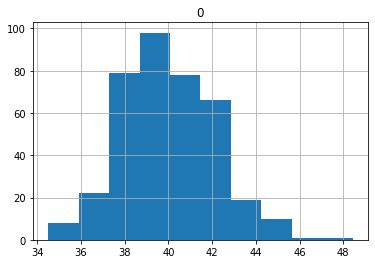

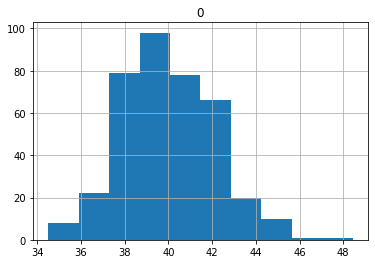

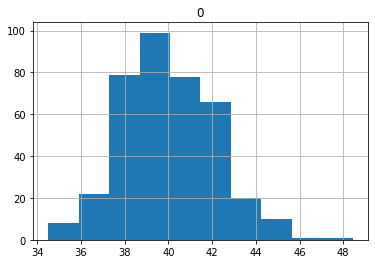

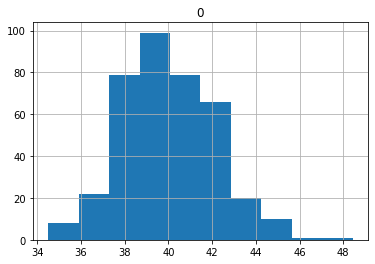

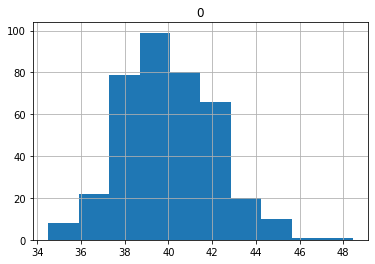

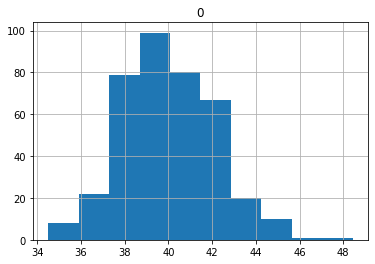

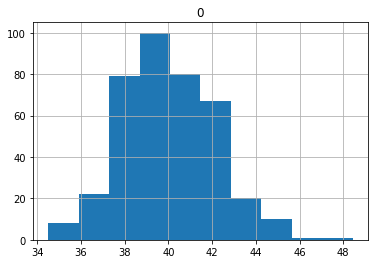

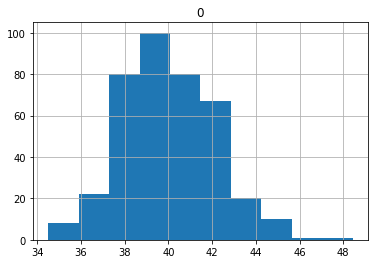

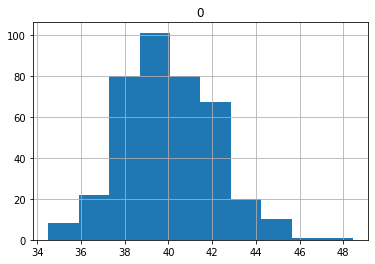

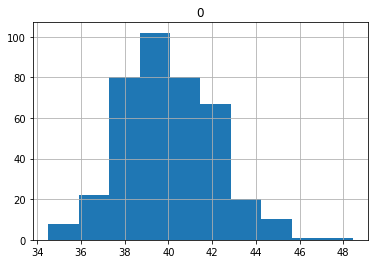

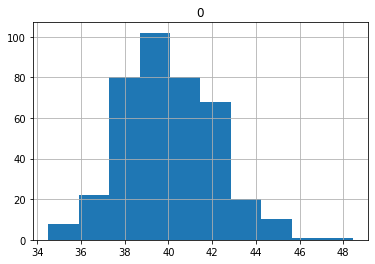

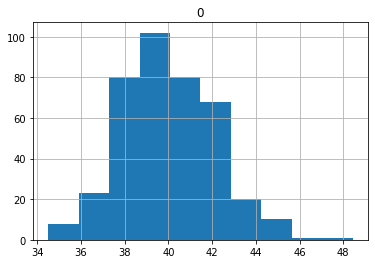

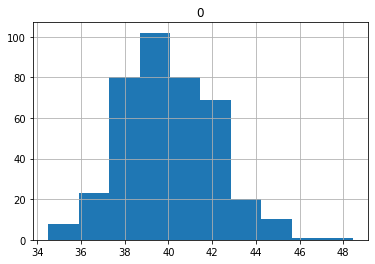

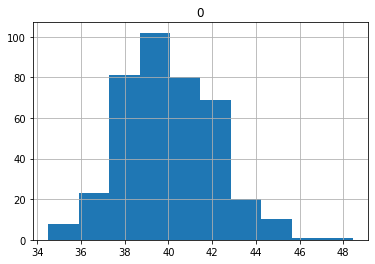

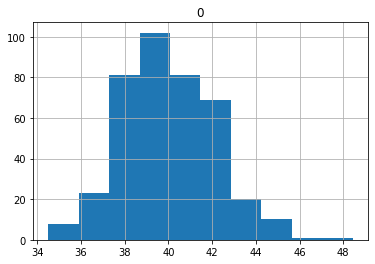

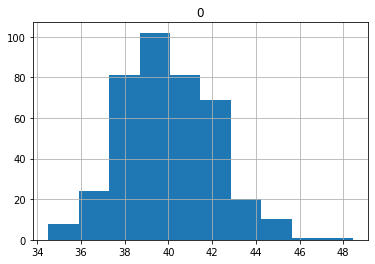

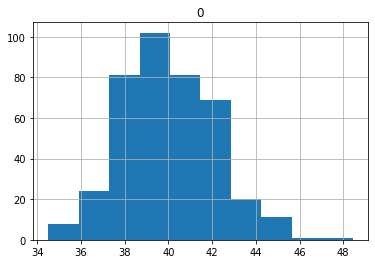

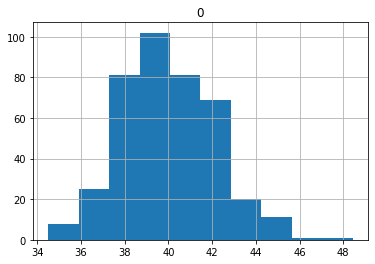

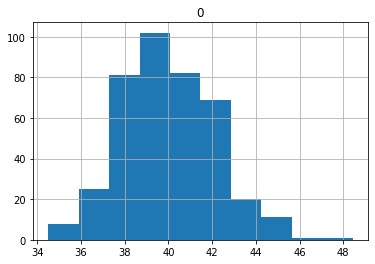

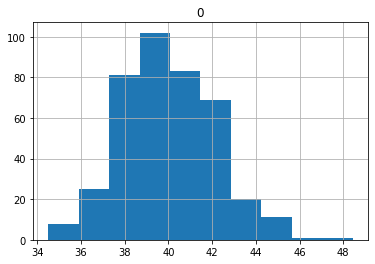

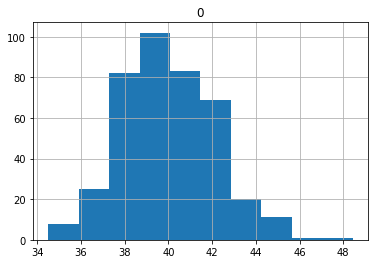

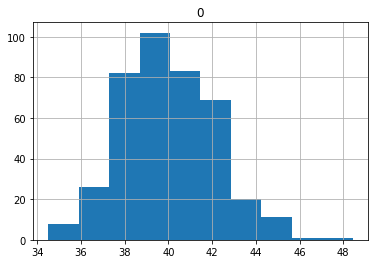

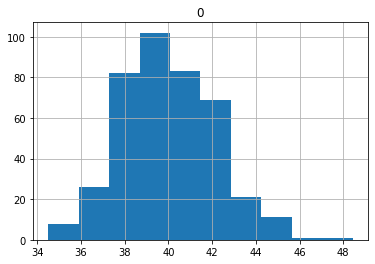

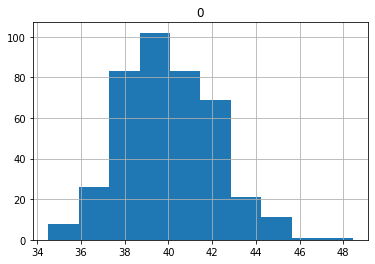

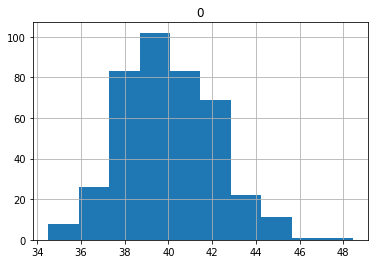

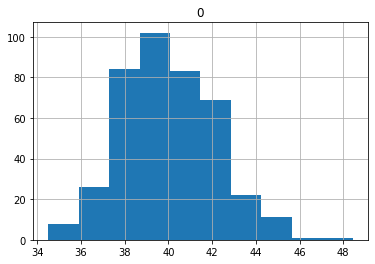

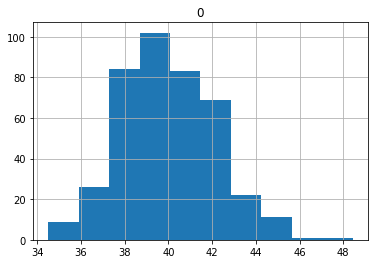

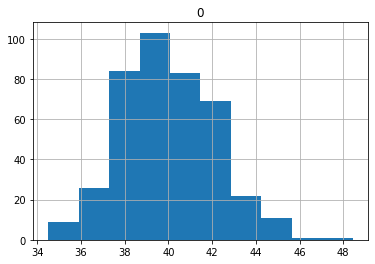

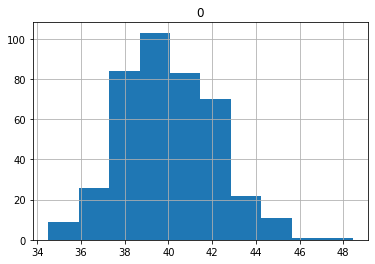

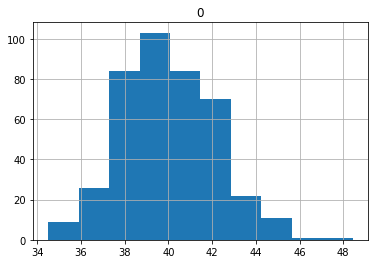

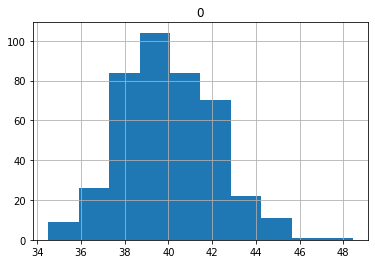

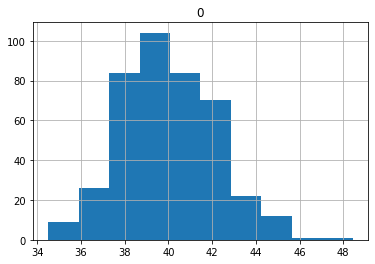

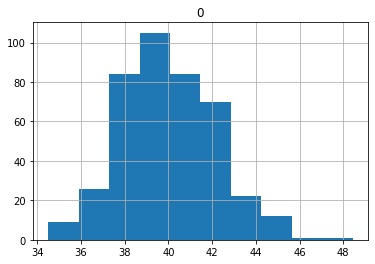

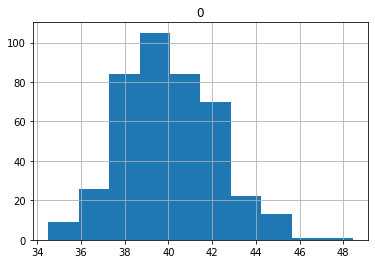

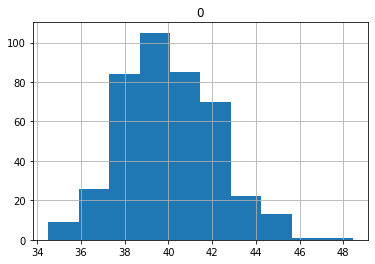

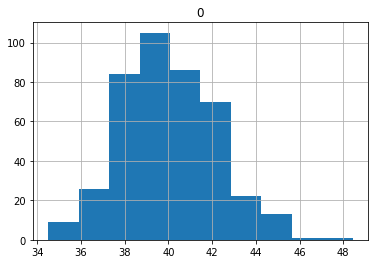

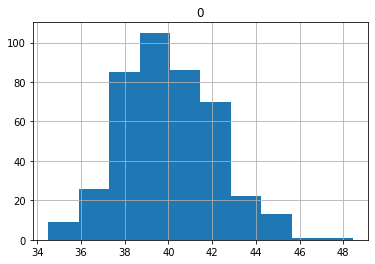

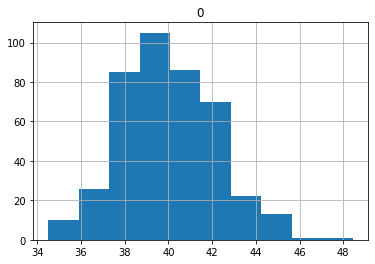

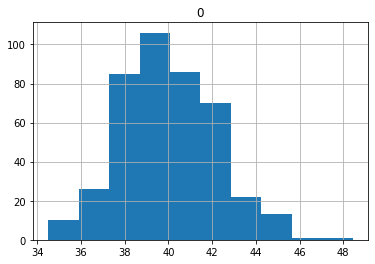

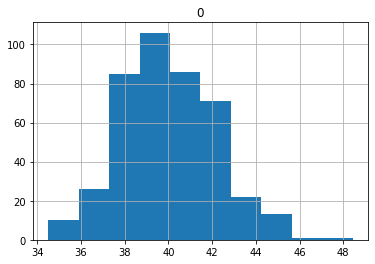

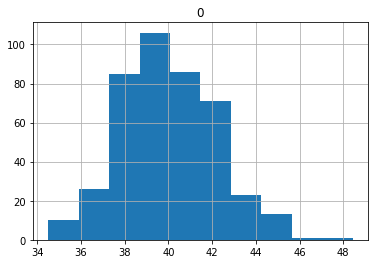

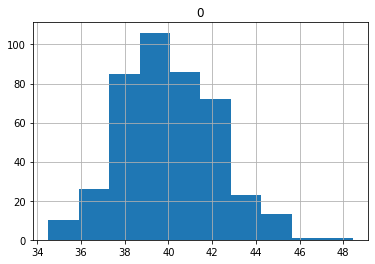

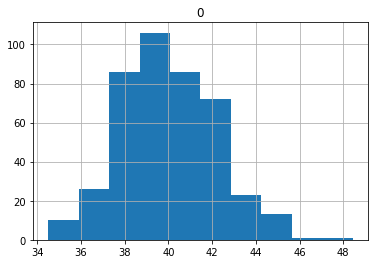

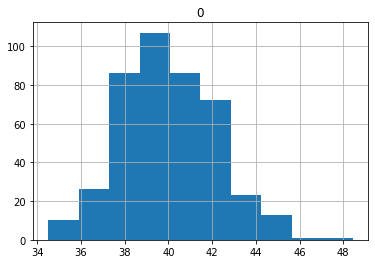

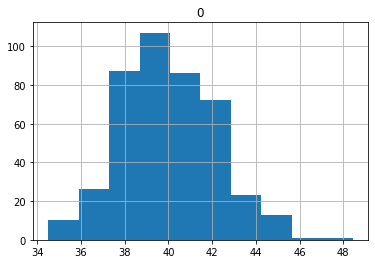

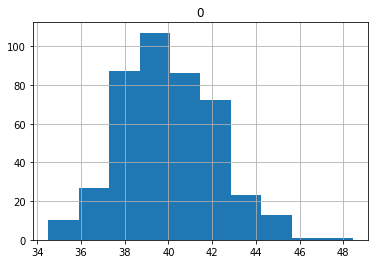

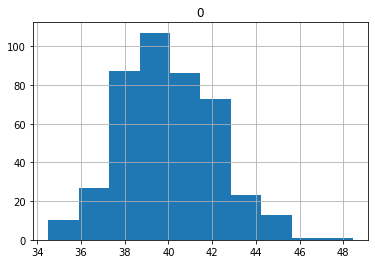

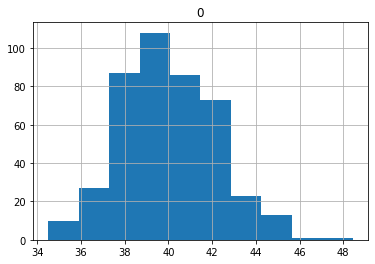

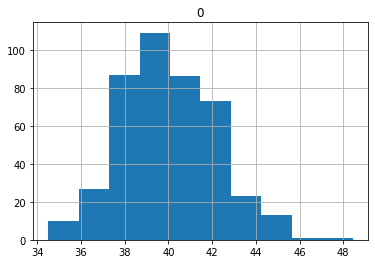

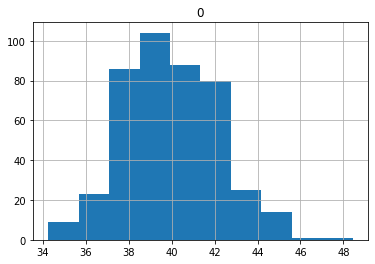

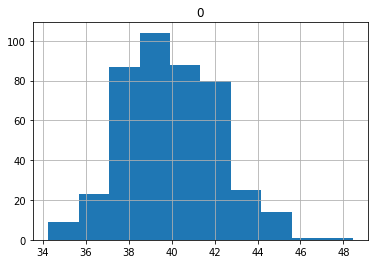

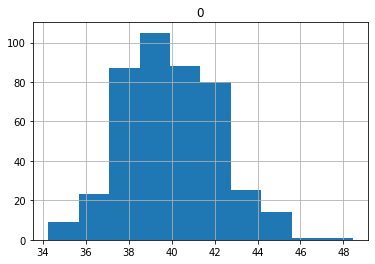

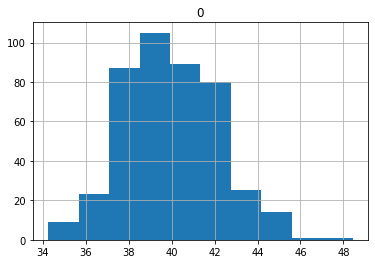

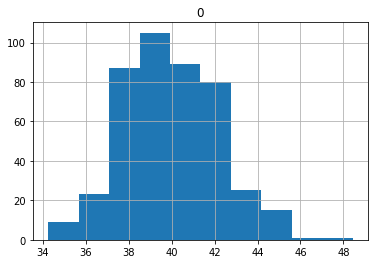

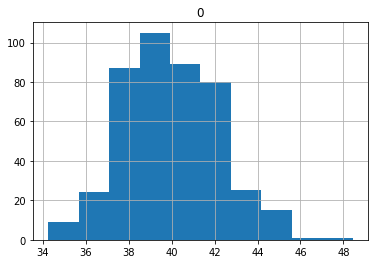

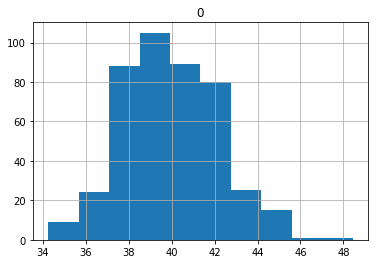

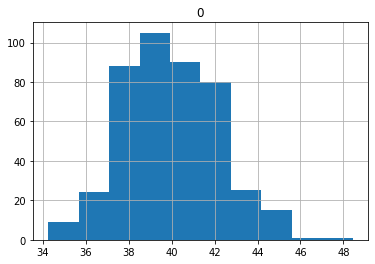

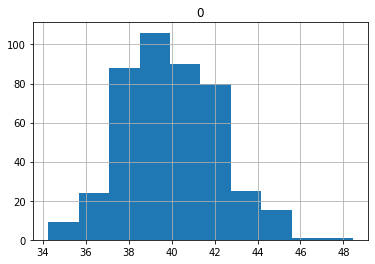

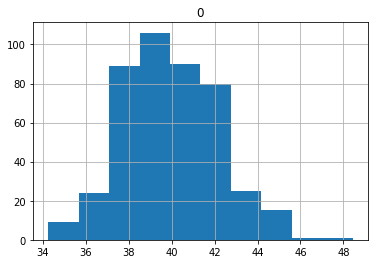

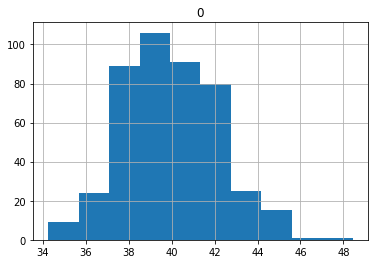

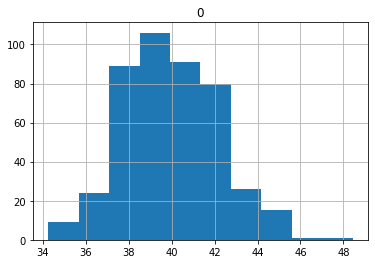

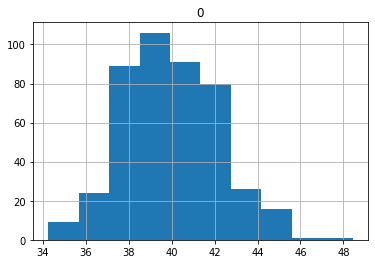

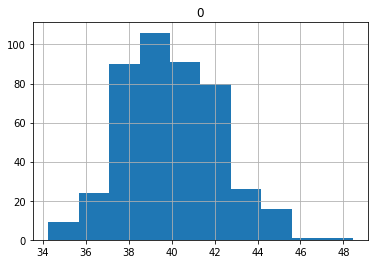

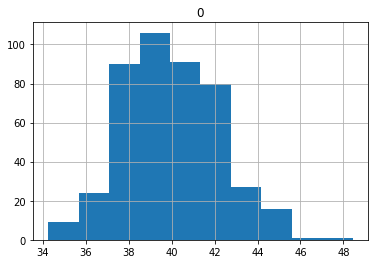

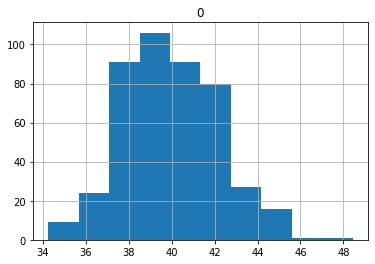

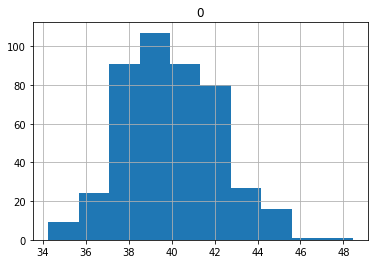

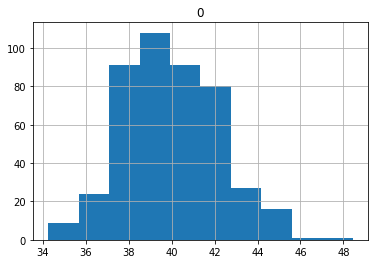

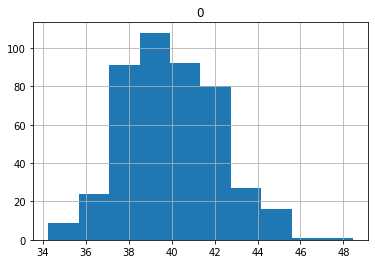

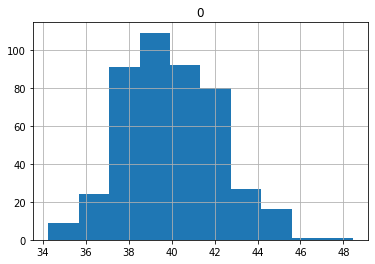

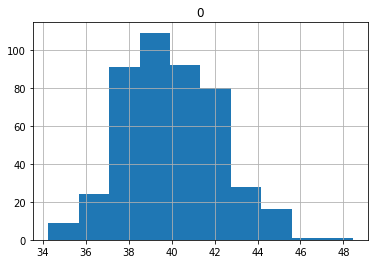

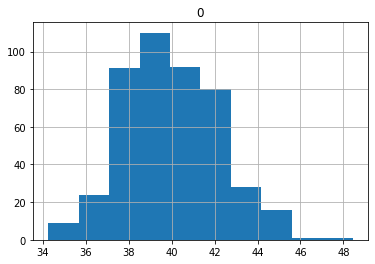

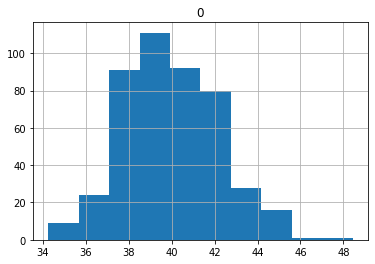

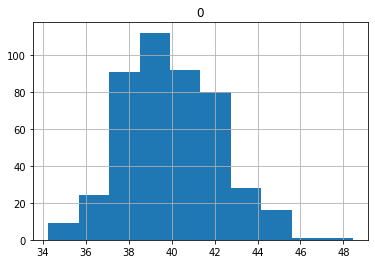

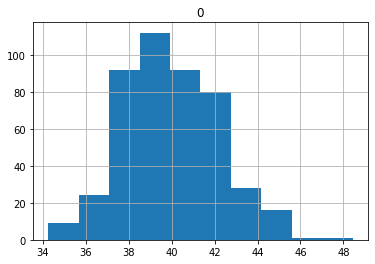

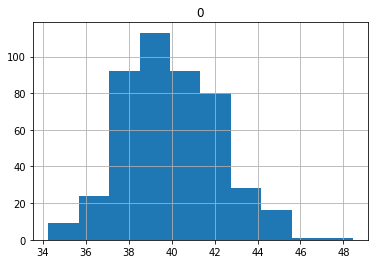

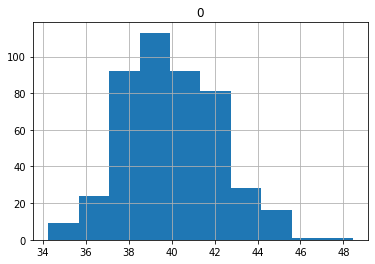

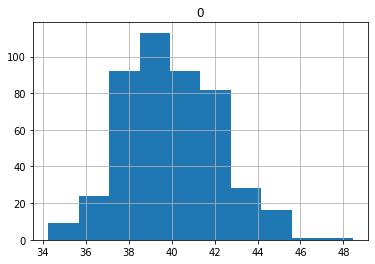

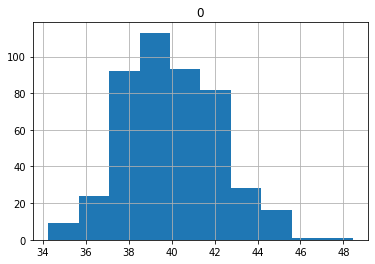

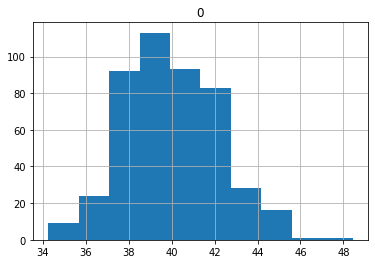

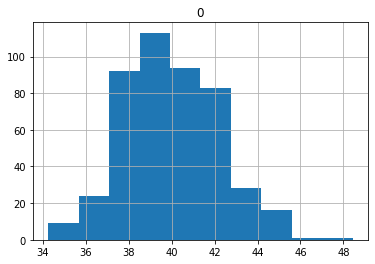

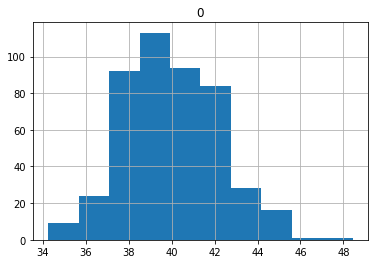

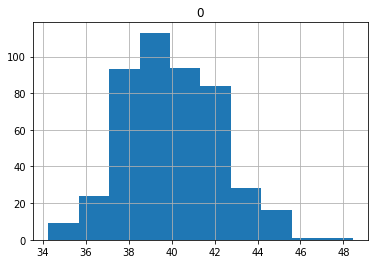

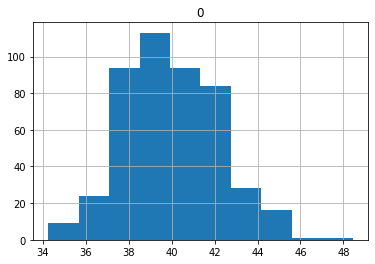

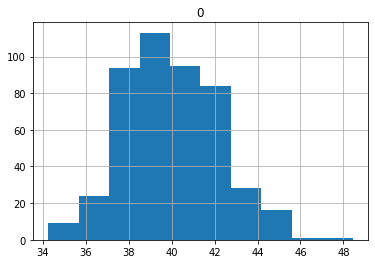

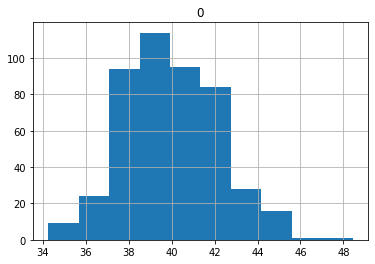

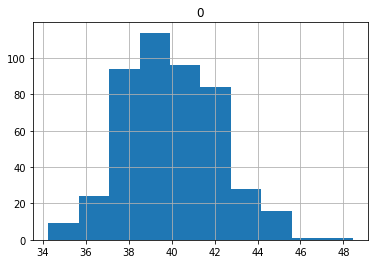

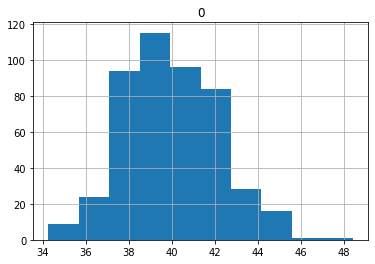

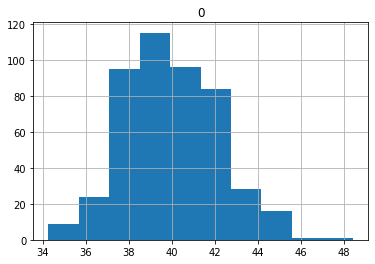

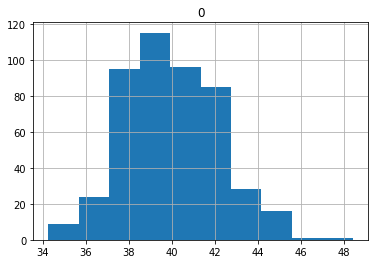

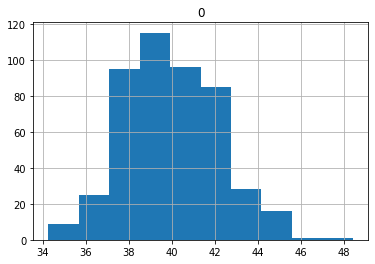

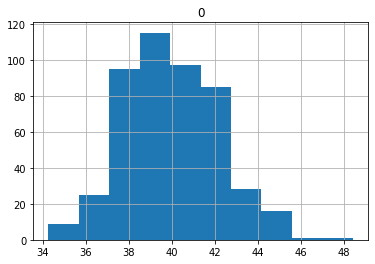

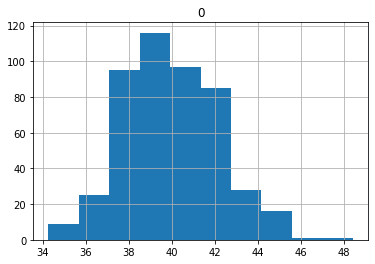

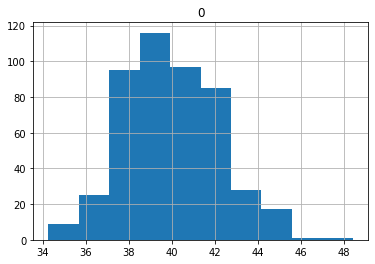

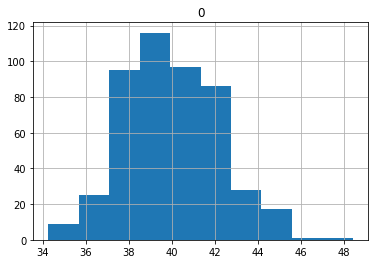

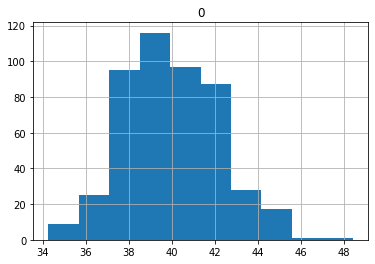

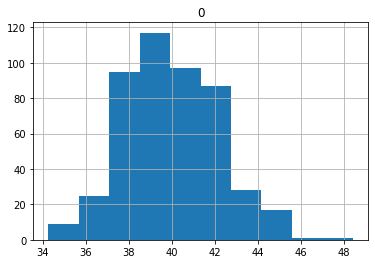

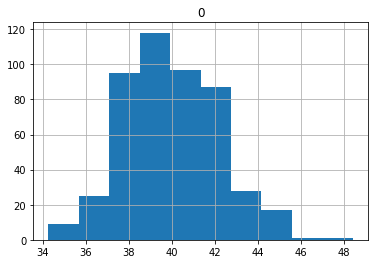

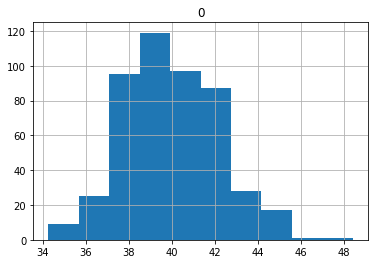

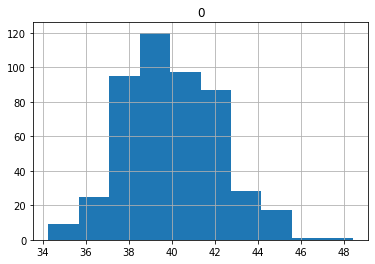

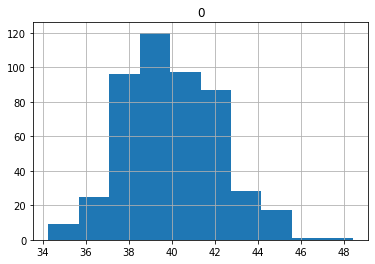

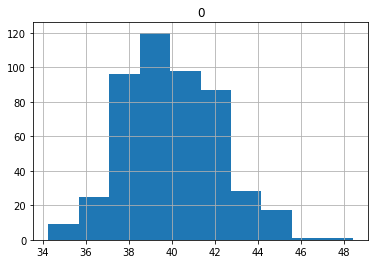

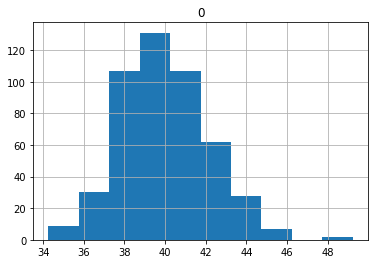

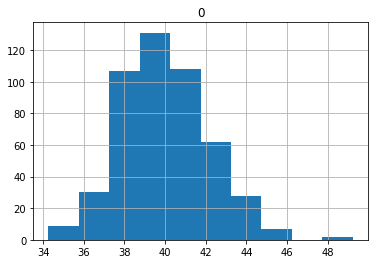

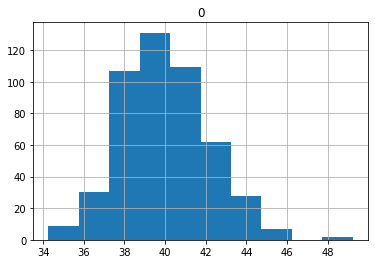

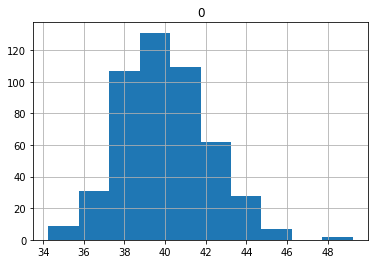

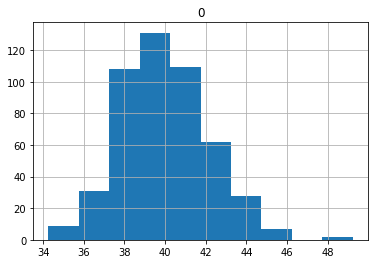

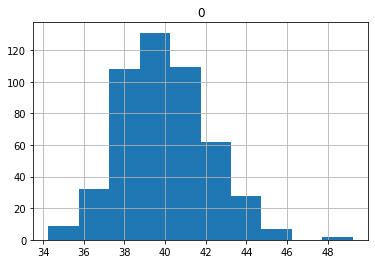

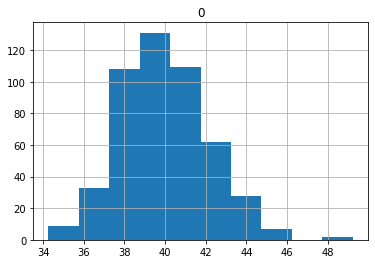

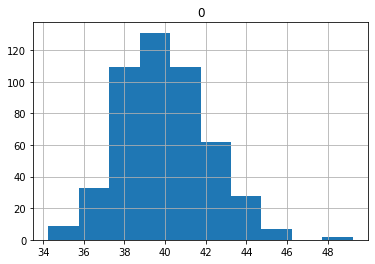

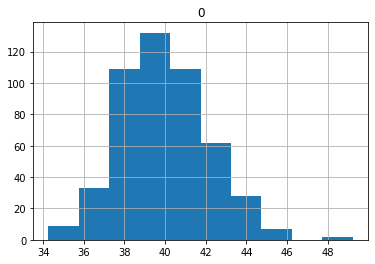

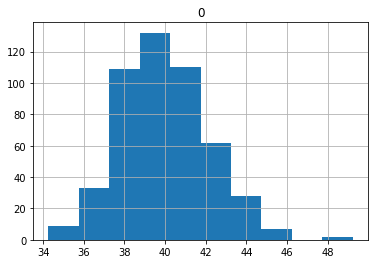

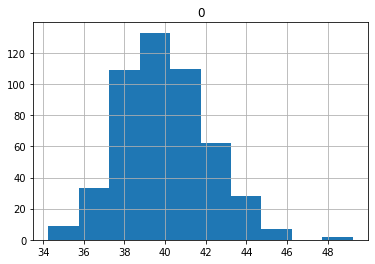

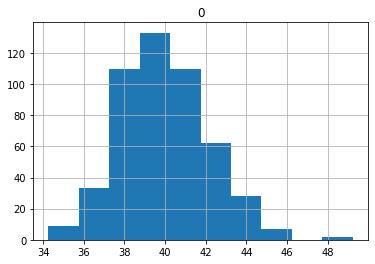

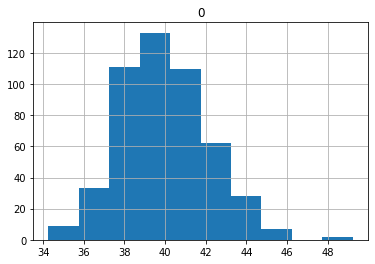

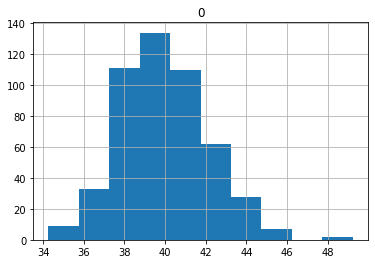

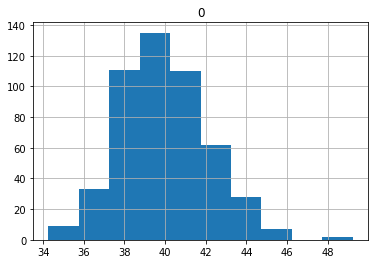

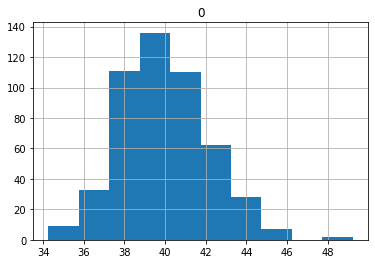

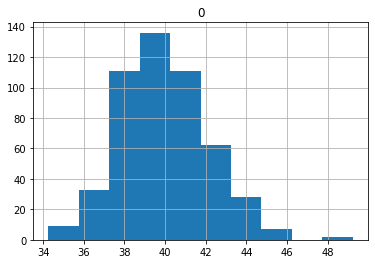

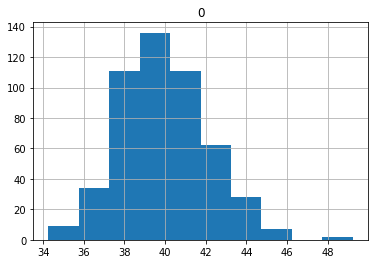

In [ ]:
point_estimates = []
for x in range(500): # Generate 500 samples
 sample = np.random.choice(a= breaks, size=100)
#take a sample of 100 points
 point_estimates.append( sample.mean() )
# add the sample mean to our list of point estimates
 pd.DataFrame(point_estimates).hist()
# look at the distribution of our sample means

In [ ]:
breaks.mean() - np.array(point_estimates).mean()

0.04232444444443928

In [ ]:
Problem Statement:Confidence Interval

Q1.For a company of 9000 employees, find the average length of breaks taken by employees in a single day using sample mean point estimate.

Find margin of error of point estimate sample mean that is range values of confidence, by calculating the confidence interval with confidence level .95. Compare the population parameter and population mean. Get 10000 different confidence intervals and check the existence population parameter (Population mean) into it. Also get the total count of getting the population parameter in the range of confidence interval. Demonstrate the statement, “ The sizeof confidence interval changes as we change the confidence level”, using Python Code.

In [ ]:
##CONFIDENCE INTERVAL
sample_size = 100
# the size of the sample we wish to take
sample = np.random.choice(a= breaks, size = sample_size)
# a sample of sample_size taken from the 9,000 breaks population from before
sample_mean = sample.mean()
# the sample mean of the break lengths sample
sample_stdev = sample.std()
# sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)
# population standard deviation estimate
stats.t.interval(alpha = 0.95, # Confidence level 95%
df= sample_size - 1, # Degrees of freedom
loc = sample_mean, # Sample mean
scale = sigma) # Standard deviation

(36.29263468910625, 45.26736531089375)

In [ ]:
#function to make confidence interval
def makeConfidenceInterval():
 sample_size = 100
 sample = np.random.choice(a= breaks, size = sample_size)
 sample_mean = sample.mean()
# sample mean
 sample_stdev = sample.std()
# sample standard deviation
 sigma = sample_stdev/math.sqrt(sample_size)
# population Standard deviation estimate
 return stats.t.interval(alpha = 0.95, df= sample_size - 1, loc= sample_mean, scale= sigma)

In [ ]:

for confidence in (.5, .8, .85, .9, .95, .99):
 confidence_interval = stats.t.interval(alpha = confidence, df = sample_size - 1, loc = sample_mean, scale = sigma)
 length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)
 # the length of the confidence interval
 print ("confidence {0} has a interval of size {1}".format(confidence, length_of_interval))

confidence 0.5 has a interval of size 3.06
confidence 0.8 has a interval of size 5.84
confidence 0.85 has a interval of size 6.56
confidence 0.9 has a interval of size 7.51
confidence 0.95 has a interval of size 8.97
confidence 0.99 has a interval of size 11.88
